# Cleaning LCA Project


                        by 

### Tesfaye Woldeyohanes

This script conducts data preprocessing techniques that follows the cleaning procedure of the LCA data that was collected in endline for purposes of developing indicators from the cleaned dataset. 

Below are the modules that will be cleaned in the following script:



### MODULE 2: HOUSEHOLD LIVELIHOOD


### MODULE 3: ASSETS


### MODULE 4: PARTICIPATION  IN GROUPS


### MODULE 5 COPING STRATEGIES 


### MODULE 6: PRODUCTS COLLECTED FROM COMMONS


### MODULE 7: FARM SKETCH


### MODULE 9: 2023 KHARIF CROPS


### MODULE 10: 2021 SAMPLED RESPONDENT TRANSITION


### MODULE 11: FOOD SECURITY


### MODULE 12: DECISIONS & ASSET


### MODULE 13: EXTERNAL SUPPORT





In [305]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import pyreadstat

# Plotting Libraries

import seaborn as sns
import matplotlib.pyplot as plt


# PCA
from sklearn.decomposition import PCA
from statsmodels.stats.correlation_tools import corr_nearest

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



import pingouin as pg
from statsmodels.stats.correlation_tools import corr_nearest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [156]:
# loading the dataset


# Specify the path to your .dta file
file_path = '/Users/la/Downloads/LCA_Endline_Final(1).dta'

# Load the .dta file into a pandas DataFrame
df = pd.read_stata(file_path)

# Load the .dta file into a pandas DataFrame along with the metadata
df, meta = pyreadstat.read_dta(file_path)


# Display the DataFrame
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,mem_age_18,mem_name_19,mem_sex_19,mem_age_19,mem_name_20,mem_sex_20,mem_age_20,mem_name_21,mem_sex_21,mem_age_21
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN


## Code Explanation for cell 13

### i) Defining the mappings for labels:
        Dictionaries (state_labels, district_labels, block_labels, village_labels) map numerical codes to their respective labels.

### ii) Encoding function:
        encode_labels: Function to map labels and convert them to the category data type.

### iii) Apply encoding:
        Each column (state_name, dis_name, block_name, village_name) is encoded into a new column (state, district, block, village).

### iv) Reorder columns:
        The columns are reordered so that state, district, block, and village appear after the ff_code column.

### v) Displaying the modified DataFrame:
        The modified DataFrame is displayed with the new order of columns and encoded categorical variables.

In [157]:
# i) Defining the mappings for labels

state_labels = {1: "Gujarat", 2: "Madhya Pradesh", 3: "Uttar Pradesh"}
district_labels = {
    11: "Devbhoomi Dwarka", 12: "Junagadh", 13: "Narmada", 14: "Surendranagar",
    21: "Khandwa", 22: "Khargone", 31: "Bahraich"
}
block_labels = {
    111: "Kalyanpur", 121: "Maliya", 131: "Dediyapada", 141: "Sayla",
    211: "Khalwa", 212: "Pandhana", 221: "Jhiranya", 311: "Chittaura", 312: "Risia"
}
village_labels = {
    1111: "Bamansa", 1112: "Bhatavdiya", 1113: "Gandhavi", 1114: "Gokalpar",
    1115: "Haripar", 1116: "Jampar", 1117: "Juvanpur", 1118: "Kanakpar",
    1119: "Kanpar Sherdi", 11110: "Patelaka", 11111: "Pindara", 1211: "Amrapur",
    1212: "Gangecha", 1213: "Jandi", 1214: "Juthal", 1215: "Lathodra",
    1216: "Moti Dhnej", 1217: "Nani dhanej", 1218: "Pikhor", 1219: "Samadhiyala",
    12110: "Vadiya", 1311: "Babada", 1312: "Bedada", 1313: "Boridabara",
    1314: "Boripitha", 1315: "Chuli", 1316: "Gulda Alias Cham", 1317: "Kanjai",
    1318: "Khaidipada", 1319: "Moskut", 13110: "Mulkapada", 13111: "Navagam (Panuda)",
    13112: "Patdi", 13113: "Relva", 13114: "Rohda", 13115: "Rukhal", 13116: "Sabuti",
    13117: "Vadpada", 13118: "Zari", 1411: "Dhajala", 1412: "Dhamarashala",
    1413: "Dhinkwali", 1414: "Titoda", 1415: "Garambhadi", 1416: "Gundiyavada",
    1417: "Khintala", 1418: "Lakhavad", 1419: "Limbala", 14110: "Mangalkui",
    14111: "Mota Sakhapar", 14112: "Nana Sagpar", 14113: "Ovangadh",
    14114: "Shirvaniya", 14115: "Gadh", 2111: "Ahmadnagar", 2112: "Ambada",
    2113: "Ambapath", 2114: "Dabhiya", 2115: "Dhavdi", 2116: "Garbedi",
    2117: "Jamdhad", 2118: "Kumharkheda", 2119: "Manpura", 21110: "Mohnyakheda (Sandalpur)",
    21111: "Mojwadi", 21112: "Udyapur Raiyat", 2121: "Anjongoan", 2122: "Aradala",
    2123: "Astriya", 2124: "Badoda Ahir", 2125: "Bilood", 2126: "Dapkiya",
    2127: "Dhawadiya", 2128: "Goradiya", 2129: "Guwadi", 21210: "Jamli",
    21211: "Kakoda", 21212: "Mandwa", 21213: "Nankheda", 21214: "Rajgad",
    21215: "Rajola", 21216: "Udaipur", 21217: "Umarda", 2211: "Avliyamal",
    2212: "Badi", 2213: "Bagdari", 2214: "Balkhad", 2215: "Bedaniya (Bujurg)",
    2216: "Bhavsingpura", 2217: "Chendiyaanjan", 2218: "Kalikundi", 2219: "Paldha",
    22110: "Palona", 22111: "Ratlipura", 22112: "Rehatphal", 22113: "Saka",
    22114: "Sidhwadi", 22115: "Tigriya", 3111: "Baidipur", 3112: "Beghampur",
    3113: "Bhagwanpur Mafi", 3114: "Bhogajot", 3115: "Bichhla", 3116: "Chafariya",
    3117: "Chakutjot", 3118: "Damodarjot", 3119: "Dharmanpur", 31110: "Fulwariya",
    31111: "Godi", 31112: "Gondhibasahi", 31113: "Gulhariya", 31114: "Jaadharbhar",
    31115: "Jagdishpur Sakra", 31116: "Janijot", 31117: "Kishunpurmafi",
    31118: "Laukna", 31119: "Mallapur", 31120: "Muravpurwa", 31121: "Rasoolichak",
    31122: "Raypur", 31123: "Raypurgarwa", 31124: "Sankalpmafi", 31125: "Shahnewajpur",
    31126: "Singahe", 31127: "Sisaiachak", 31128: "Surwari", 31129: "Tepra",
    31130: "Teriya", 3121: "Babhani", 3122: "Balbhaddarpur", 3123: "Bangla",
    3124: "Bargawan", 3125: "Bhaisara", 3126: "Bhaluwa-bhakuraha", 3127: "Bhaukhara",
    3128: "Bhopatpur Chauki", 3129: "Charsandamafi", 31210: "Elyaspurageiya",
    31211: "Gauradhanauli", 31212: "Gokulpur", 31213: "Hudarwa", 31214: "Husenpurmirdangi",
    31215: "Hussanpur Moham", 31216: "Jamaluddinjot", 31217: "Jhanchak", 31218: "Karaunda",
    31219: "Khudabhari", 31220: "Lauki", 31221: "Maharu", 31222: "Maliabarganwa",
    31223: "Najhuwamujehna", 31224: "Nibiyabehampur", 31225: "Padaitara",
    31226: "Prasakhargamah", 31227: "Rampurbaraie", 31228: "Sanokhan",
    31229: "Shankarpur", 31230: "Teliya"
}


In [158]:
# Reverse the state_labels dictionary to get state codes
state_codes = {v: k for k, v in state_labels.items()}

# Reverse the district_labels dictionary to get district codes
district_codes = {v: k for k, v in district_labels.items()}

# Reverse the block_labels dictionary to get block codes
block_codes = {v: k for k, v in block_labels.items()}

# Reverse the village_labels dictionary to get village codes
village_codes = {v: k for k, v in village_labels.items()}



In [159]:
# Replace the state names with state codes in the DataFrame
df['state_name'] = df['state_name'].replace(state_codes)

# Replace the district names with district codes in the DataFrame
df['dis_name'] = df['dis_name'].replace(district_codes)

# Replace the block names with block codes in the DataFrame
df['block'] = df['block'].replace(block_codes)

# Replace the village names with village codes in the DataFrame
df['village_name'] = df['village_name'].replace(village_codes)


In [160]:
# Verify the changes
print(df[['state_name', 'dis_name', 'block', 'village_name']].head())


   state_name         dis_name    block village_name
0           1  Devbhumi Dwarka  Bhatiya         1112
1           1  Devbhumi Dwarka  Bhatiya         1112
2           1  Devbhumi Dwarka  Bhatiya         1112
3           1  Devbhumi Dwarka  Bhatiya         1112
4           1  Devbhumi Dwarka  Bhatiya         1112


In [9]:
# Ensure the columns are correctly positioned

cols = list(df.columns)
new_columns_order = cols[:3] + ['state_name', 'dis_name', 'block', 'village_name'] + cols[3:]
df = df[new_columns_order]

df.head()  # Display the first few rows to verify

,deviceid,device_num,text_audit,state_name,dis_name,block,village_name,audio_audit_1,audio_audit_2,audio_audit_3,...,mem_age_18,mem_name_19,mem_sex_19,mem_age_19,mem_name_20,mem_sex_20,mem_age_20,mem_name_21,mem_sex_21,mem_age_21
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,1,Devbhumi Dwarka,Bhatiya,1112,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,1,Devbhumi Dwarka,Bhatiya,1112,https://icraf.surveycto.com/view/submission-at...,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,1,Devbhumi Dwarka,Bhatiya,1112,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,1,Devbhumi Dwarka,Bhatiya,1112,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,1,Devbhumi Dwarka,Bhatiya,1112,,,,...,NaN,,NaN,NaN,,NaN,NaN,,NaN,NaN


In [11]:
# Extract and arrange the specified columns
columns_to_extract = [
    'state_name', 'dis_name', 'block', 'village_name', 'ff_code', 'farmer_name', 
    'farmer_sex', 'res_sex', 'mobile', 'enumerator', 'mem_name_1',
    'confirm_gpslatitude', 'confirm_gpslongitude', 'confirm_gpsaltitude'
]

df_geo = df[columns_to_extract]

# Save the new DataFrame to a CSV file
df_geo.to_csv('df_geo_LCA_Endline.csv', index=False)

# Display the first few rows of the new DataFrame to verify
df_geo.head()


,state_name,state_name,dis_name,dis_name,block,block,village_name,village_name,ff_code,farmer_name,farmer_sex,res_sex,mobile,enumerator,mem_name_1,confirm_gpslatitude,confirm_gpslongitude,confirm_gpsaltitude
0,1,1,Devbhumi Dwarka,Devbhumi Dwarka,Bhatiya,Bhatiya,1112,1112,11101_10_M,Bhatiya Nathiben Sukabhai Meramanbhai,Female,male,9687301120,Prakash meghval (593115),Bhatiya sukabhai meramanbhai,22.051895,69.218880,-11.900000
1,1,1,Devbhumi Dwarka,Devbhumi Dwarka,Bhatiya,Bhatiya,1112,1112,11101_12_M,Sonagra Chhaganbhai Jivabhai,Male,male,9712214296,Prakash meghval (593115),Chhaganbhai,22.069996,69.215828,-42.900002
2,1,1,Devbhumi Dwarka,Devbhumi Dwarka,Bhatiya,Bhatiya,1112,1112,11101_13_F,Sonagra Rajeshbhai Madhabhai,Male,female,9687301551,Kinjal (767984),Rajeshbhai,22.068914,69.211426,-41.000000
3,1,1,Devbhumi Dwarka,Devbhumi Dwarka,Bhatiya,Bhatiya,1112,1112,11101_14_M,Bhatiya Lakhaman Gova,Male,male,8780202031,Nilam Joshi (262116),Govabhai,22.038488,69.261826,-41.200001
4,1,1,Devbhumi Dwarka,Devbhumi Dwarka,Bhatiya,Bhatiya,1112,1112,11101_15_F,Sonagra Jethabhai Virajibhai,Male,female,9726526416,Priya Yadav (974431),Jethabhai,22.065315,69.221817,-35.799999


In [163]:
# Print the columns of the DataFrame
print(df.columns)

# Identify and print duplicate columns in the DataFrame
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)

# Remove duplicate columns from the DataFrame
df = df.loc[:, ~df.columns.duplicated()]



Index(['deviceid', 'device_num', 'text_audit', 'audio_audit_1',
       'audio_audit_2', 'audio_audit_3', 'audio_audit_4', 'audio_audit_5',
       'audio_audit_6', 'audio_audit_7',
       ...
       'mem_age_18', 'mem_name_19', 'mem_sex_19', 'mem_age_19', 'mem_name_20',
       'mem_sex_20', 'mem_age_20', 'mem_name_21', 'mem_sex_21', 'mem_age_21'],
      dtype='object', length=11247)
Duplicate Columns: Index([], dtype='object')


## MODULE 2: HOUSEHOLD LIVELIHOOD
### Farm activities

### 1. On-farm Activities

In [164]:
# Create new variables based on conditions
df['hh_ls_rear'] = (df['on_farm_act_5'] | df['on_farm_act_6'] | df['on_farm_act_7'] | (df['ls_hh'] == 1)).astype(int)
df['hh_food_crop'] = df['on_farm_act_1'].astype(int)
df['hh_food_crop_sale'] = df['on_farm_act_2'].astype(int)
df['hh_cash_crop'] = df['on_farm_act_4'].astype(int)
df['hh_horti_crop'] = df['on_farm_act_3'].astype(int)
df['hh_crop_prod'] = (df['hh_food_crop'] | df['hh_food_crop_sale'] | df['hh_cash_crop'] | df['hh_horti_crop']).astype(int)
df['hh_ag_labor'] = df['on_farm_act_8'].astype(int)

# Drop rows where ff_code is "12103_1_F"
df = df[df['ff_code'] != "12103_1_F"]

# Display the first few rows to verify
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,mem_name_21,mem_sex_21,mem_age_21,hh_ls_rear,hh_food_crop,hh_food_crop_sale,hh_cash_crop,hh_horti_crop,hh_crop_prod,hh_ag_labor
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,,NaN,NaN,1,0,1,0,0,1,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,,NaN,NaN,1,0,1,0,0,1,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,,NaN,NaN,1,1,1,0,0,1,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,,NaN,NaN,1,0,1,0,0,1,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,,NaN,NaN,1,1,1,0,0,1,0


### 2. Off-farm Activities

In [171]:
# List of columns to process
activity_columns = [
    "off_farm_act_1", "off_farm_act_2",
    "off_farm_act_3", "off_farm_act_4",
    "off_farm_act_5", "off_farm_act_6",
    "off_farm_act_7", "off_farm_act_8",
    "off_farm_act_9", "off_farm_act_10"
]

# Replace values with 1 where activity is present, 0 otherwise
df[activity_columns] = df[activity_columns].applymap(lambda x: 1 if x == 1 else 0)


In [172]:
# List of new column names
activity_columns = [
    "off_farm_act_1", "off_farm_act_2",
    "off_farm_act_3", "off_farm_act_4",
    "off_farm_act_5", "off_farm_act_6",
    "off_farm_act_7", "off_farm_act_8",
    "off_farm_act_9", "off_farm_act_10"
]


# Display the columns with new names
new_columns_df = df[activity_columns]
new_columns_df.head()

,off_farm_act_1,off_farm_act_2,off_farm_act_3,off_farm_act_4,off_farm_act_5,off_farm_act_6,off_farm_act_7,off_farm_act_8,off_farm_act_9,off_farm_act_10
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [173]:
# Generating a new column called: n_hh_off_act

# List of columns representing off-farm activities
off_farm_columns = [
    "off_farm_act_1", "off_farm_act_2", "off_farm_act_3", "off_farm_act_4",
    "off_farm_act_5", "off_farm_act_6", "off_farm_act_7", "off_farm_act_8",
    "off_farm_act_9", "off_farm_act_10"
]

# Calculate the row total and create a new column 'n_hh_off_act'
df['n_hh_off_act'] = df[off_farm_columns].sum(axis=1)

# Display the updated DataFrame to verify
df[['n_hh_off_act'] + off_farm_columns].head()

,n_hh_off_act,off_farm_act_1,off_farm_act_2,off_farm_act_3,off_farm_act_4,off_farm_act_5,off_farm_act_6,off_farm_act_7,off_farm_act_8,off_farm_act_9,off_farm_act_10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [174]:
# Create the new column 'hh_skilled_job' based on the logical OR between 'off_farm_act_1' and 'off_farm_act_4'
df['hh_skilled_job'] = df['off_farm_act_1'] | df['off_farm_act_4']

# Display the updated DataFrame to verify
df[['hh_skilled_job', 'off_farm_act_1', 'off_farm_act_4']].head()

,hh_skilled_job,off_farm_act_1,off_farm_act_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [175]:
# Create the new column 'hh_remittance' and set it equal to 'off_farm_act_7'
df['hh_remittance'] = df['off_farm_act_7']

# Display the updated DataFrame to verify
df[['hh_remittance', 'off_farm_act_7']].head()

,hh_remittance,off_farm_act_7
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [176]:

# Convert 'on_farm_act_n' and 'n_hh_off_act' to numeric, forcing conversion
df['on_farm_act_n'] = pd.to_numeric(df['on_farm_act_n'], errors='coerce')
df['n_hh_off_act'] = pd.to_numeric(df['n_hh_off_act'], errors='coerce')

# Create the new column 'n_livi_hh_act' as the row sum of 'on_farm_act_n' and 'n_hh_off_act'
df['n_livi_hh_act'] = df['on_farm_act_n'] + df['n_hh_off_act']

# Display the updated DataFrame to verify
print(df[['on_farm_act_n', 'n_hh_off_act', 'n_livi_hh_act']].head())


   on_farm_act_n  n_hh_off_act  n_livi_hh_act
0            1.0             0            1.0
1            2.0             0            2.0
2            3.0             1            4.0
3            2.0             0            2.0
4            2.0             0            2.0


### 3. Household Productive Activities

In [177]:
# household productive activities
# Generating new variable for total number of livelihood activities

# Create the new column 'n_livi_hh_act' as the row sum of 'on_farm_act_n' and 'n_hh_off_act'
df['n_livi_hh_act'] = df['on_farm_act_n'] + df['n_hh_off_act']

# Display the updated DataFrame to verify
print(df[['on_farm_act_n', 'n_hh_off_act', 'n_livi_hh_act']].head())


   on_farm_act_n  n_hh_off_act  n_livi_hh_act
0            1.0             0            1.0
1            2.0             0            2.0
2            3.0             1            4.0
3            2.0             0            2.0
4            2.0             0            2.0


### 4. No Productive Work

In [179]:
# Step 1: Create the initial column 'hh_no_livi_act' based on 'on_farm_act_777'
df['hh_no_livi_act'] = df['on_farm_act_777']

# Step 2: Replace 'hh_no_livi_act' with 0 if certain conditions are met
df.loc[df['ls_hh'] == 1, 'hh_no_livi_act'] = 0
df.loc[df['n_livi_hh_act'] > 0, 'hh_no_livi_act'] = 0

# Display the updated DataFrame to verify
df.head()

,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,hh_food_crop_sale,hh_cash_crop,hh_horti_crop,hh_crop_prod,hh_ag_labor,hh_skilled_job,hh_remittance,n_hh_off_act,n_livi_hh_act,hh_no_livi_act
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,1,0,0,1,0,0,0,0,1.0,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,1,0,0,1,0,0,0,0,2.0,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,1,0,0,1,0,0,0,1,4.0,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,1,0,0,1,0,0,0,0,2.0,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,1,0,0,1,0,0,0,0,2.0,0


## MODULE 3: ASSETS
### Livestock

In [180]:
# Generate cow_hh column
df['cow_hh'] = (df['ls_hh_typ_1'] == 1).astype(int)

# Generate cow_imp_hh column
df['cow_imp_hh'] = ((df['cow_1_spec'] == 1) | (df['cow_m_spec_2'] == 1) | (df['cow_m_spec_3'] == 1)).astype(int)

# Generate cow_3p column
df['cow_3p'] = ((df['cow_n'] > 2) & (df['cow_n'].notna())).astype(int)

# Generate bull_hh column
df['bull_hh'] = (df['ls_hh_typ_2'] == 1).astype(int)

# Generate bull_imp_hh column
df['bull_imp_hh'] = ((df['bull_1_spec'] == 1) | (df['bull_m_spec_2'] == 1) | (df['bull_m_spec_3'] == 1)).astype(int)

# Generate buffalo_hh column
df['buffalo_hh'] = (df['ls_hh_typ_3'] == 1).astype(int)

# Generate bull_2p column
df['bull_2p'] = ((df['bull_n'] > 1) & (df['bull_n'].notna())).astype(int)

# Generate buffalo_2p column
df['buffalo_2p'] = ((df['buff_n'] > 1) & (df['buff_n'].notna())).astype(int)

# Generate goat_hh column
df['goat_hh'] = (df['ls_hh_typ_5'] == 1).astype(int)

# Generate goat_4p column
df['goat_4p'] = ((df['goat_n'] > 3) & (df['goat_n'].notna())).astype(int)

# Generate sheep_hh column
df['sheep_hh'] = (df['ls_hh_typ_4'] == 1).astype(int)

# Generate sheep_4p column
df['sheep_4p'] = ((df['sheep_n'] > 3) & (df['sheep_n'].notna())).astype(int)

# Generate poultry_hh column
df['poultry_hh'] = (df['ls_hh_typ_6'] == 1).astype(int)

# Generate poultry_6p column
df['poultry_6p'] = ((df['poul_n'] > 5) & (df['poul_n'].notna())).astype(int)

# Generate oth_ls_hh column
df['oth_ls_hh'] = (df['ls_hh_typ_50'] == 1).astype(int)




In [181]:
# Display the first few rows of each newly generated livestock column
print("First few rows for livestock-related columns:")
df[['cow_hh', 'cow_imp_hh', 'cow_3p', 'bull_hh', 'bull_imp_hh', 
          'buffalo_hh', 'bull_2p', 'buffalo_2p', 'goat_hh', 'goat_4p', 
          'sheep_hh', 'sheep_4p', 'poultry_hh', 'poultry_6p', 'oth_ls_hh']].head()


First few rows for livestock-related columns:


,cow_hh,cow_imp_hh,cow_3p,bull_hh,bull_imp_hh,buffalo_hh,bull_2p,buffalo_2p,goat_hh,goat_4p,sheep_hh,sheep_4p,poultry_hh,poultry_6p,oth_ls_hh
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Computing Cronbach's alpha, a measure of internal consistency or reliability of a set of scale or test items.


#### i) Calculating the Livestock Index

In [182]:


# List of columns to include in the reliability analysis
livestock_columns = [
    'cow_hh', 'cow_imp_hh', 'cow_3p', 'bull_hh', 'bull_2p', 'bull_imp_hh', 
    'buffalo_hh', 'buffalo_2p', 'goat_hh', 'goat_4p', 'sheep_hh', 'sheep_4p', 
    'poultry_hh', 'poultry_6p', 'oth_ls_hh'
]

# Ensure the columns exist in the DataFrame
df_livestock = df[livestock_columns]

# Calculate Cronbach's alpha
cronbach_alpha = pg.cronbach_alpha(df_livestock)

# Display the result
print(f"Cronbach's alpha: {cronbach_alpha[0]:.4f}")

Cronbach's alpha: 0.5385


#### ii) Taking out items with item-rest correlation <.2

In [183]:

livestock_columns = [
    'cow_hh', 'cow_3p', 'bull_hh', 'bull_2p', 
    'buffalo_hh', 'buffalo_2p', 'goat_hh', 'goat_4p', 
    'poultry_hh', 'poultry_6p'
]

# Step 1: Calculating item-rest correlations
item_rest_correlations = {}
for col in livestock_columns:
    # Define the 'rest' as the sum of all items except the current one
    rest = df[livestock_columns].drop(col, axis=1).sum(axis=1)
    # Calculate correlation between current item and the rest
    item_rest_correlations[col] = df[col].corr(rest)

# Step 2: Filter out items with item-rest correlation below 0.2
columns_to_keep = [col for col, corr in item_rest_correlations.items() if corr >= 0.2]

# Step 3: Recalculating Cronbach's Alpha for the filtered set
if len(columns_to_keep) > 0:
    df_filtered = df[columns_to_keep]
    item_variances = df_filtered.var(axis=0, ddof=1)
    total_variance = df_filtered.sum(axis=1).var(ddof=1)
    n_items = len(columns_to_keep)
    cronbach_alpha = (n_items / (n_items - 1)) * (1 - (item_variances.sum() / total_variance))
    print("Filtered columns:", columns_to_keep)
    print("Cronbach's alpha after filtering:", cronbach_alpha)
else:
    print("No columns retained after filtering based on item-rest correlations.")

Filtered columns: ['cow_hh', 'cow_3p', 'bull_hh', 'bull_2p', 'goat_hh', 'goat_4p', 'poultry_hh', 'poultry_6p']
Cronbach's alpha after filtering: 0.7098063083522864


#### iii) Constructing livestock index using principal component analysis (PCA) on a correlation matrix, specifically a tetrachoric correlation matrix, which is suitable for binary data.


### NB:  

Python does not have a direct equivalent for tetrachoric correlations in standard libraries; the closest approximation would be            using polychoric correlations or relying on specialized libraries.

#### iv) Calculating Chronbar alpha for Farm Assests

In [184]:
columns_to_check = ['oxt_cart', 'tractor', 'wbarrow', 'hand_pump', 'mot_pump', 
                    'thresher', 'cultivator', 'weeder', 'drp_irrig', 'sprinkler', 'carp_tools']

# Check and print the data types of these specific columns
data_types = df[columns_to_check].dtypes
print(data_types)

oxt_cart      object
tractor       object
wbarrow       object
hand_pump     object
mot_pump      object
thresher      object
cultivator    object
weeder        object
drp_irrig     object
sprinkler     object
carp_tools    object
dtype: object


In [185]:
# List of columns to convert
columns_to_convert = [
    'oxt_cart', 'tractor', 'wbarrow', 'hand_pump', 'mot_pump', 
    'thresher', 'cultivator', 'weeder', 'drp_irrig', 'sprinkler', 'carp_tools'
]

# Map 'Yes' to 1 and 'No' to 0
conversion_map = {'Yes': 1, 'No': 0}

# Apply the mapping to each column
for col in columns_to_convert:
    df[col] = df[col].replace(conversion_map)

# Check the updated data types and a few rows to verify the changes
print(df[columns_to_convert].dtypes)
df[columns_to_convert].head()

oxt_cart      float64
tractor       float64
wbarrow       float64
hand_pump     float64
mot_pump      float64
thresher      float64
cultivator    float64
weeder        float64
drp_irrig     float64
sprinkler     float64
carp_tools    float64
dtype: object


,oxt_cart,tractor,wbarrow,hand_pump,mot_pump,thresher,cultivator,weeder,drp_irrig,sprinkler,carp_tools
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [188]:
# df contains the necessary farm asset columns
asset_columns = ['oxt_cart', 'tractor', 'wbarrow', 'hand_pump', 'mot_pump', 
                 'thresher', 'cultivator', 'weeder', 'drp_irrig', 'sprinkler', 'carp_tools']

# Calculate Cronbach's alpha
alpha = pg.cronbach_alpha(data=df[asset_columns])

# Print the result
print(f"Cronbach's alpha: {alpha[0]}")

Cronbach's alpha: 0.41970041571238403


In [192]:
columns = ['tractor', 'mot_pump', 'thresher', 'cultivator', 'drp_irrig', 'sprinkler']

# Compute total score excluding each item at a time
item_rest_corr = {}
for item in columns:
    # Other items are all items except the current one
    other_items = [col for col in columns if col != item]
    # Total of other items
    df['rest_total'] = df[other_items].sum(axis=1)
    # Compute correlation and store
    item_rest_corr[item] = df[item].corr(df['rest_total'])

# Filter out items with item-rest correlation < 0.2
items_to_keep = [item for item, corr in item_rest_corr.items() if corr >= 0.2]

print("Items to keep based on item-rest correlation >= 0.2:", items_to_keep)


Items to keep based on item-rest correlation >= 0.2: ['tractor', 'thresher', 'cultivator']


In [193]:
def cronbach_alpha(df_items):
    # Number of items
    k = df_items.shape[1]
    # Variance of each item
    variances = df_items.var(axis=0)
    # Total variance
    total_variance = df_items.sum(axis=1).var()
    # Cronbach's alpha calculation
    return k / (k - 1) * (1 - variances.sum() / total_variance)

# Calculate Cronbach's alpha for the remaining items
if items_to_keep:
    alpha = cronbach_alpha(df[items_to_keep])
    print("Cronbach's alpha:", alpha)
else:
    print("No items left after filtering; cannot compute Cronbach's alpha.")


Cronbach's alpha: 0.728596768996001


### Calculating PCA index for FARM ASSETS

In [195]:
# Columns listed

farm_assets = ['tractor', 'mot_pump', 'thresher', 'cultivator', 'drp_irrig', 'sprinkler']


# Generate a correlation matrix, assuming binary data
corr_matrix = df[farm_assets].corr()

# Ensure the correlation matrix is positive definite
corr_matrix_posdef = corr_nearest(corr_matrix)


In [196]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=1)
pca.fit(corr_matrix_posdef)

# Get the first principal component scores for observations
df['farm_a_index'] = pca.transform(df[farm_assets].fillna(0))[:, 0]  # fillna(0) if NaNs exist
df['farm_a_index'].rename("Farm Asset PCA lca Index")
print(df[['farm_a_index']].head(150))

     farm_a_index
0        0.719668
1        0.719668
2        0.737580
3        0.064310
4        0.746502
..            ...
145      0.453645
146      0.453645
147      0.453645
148      0.462566
149      0.064310

[150 rows x 1 columns]


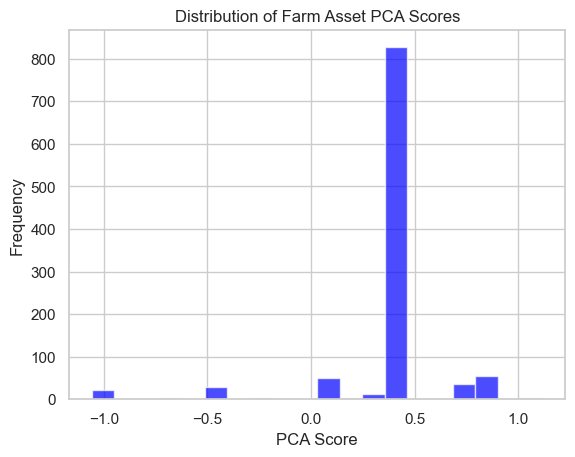

In [197]:
# Simple histogram to visualize the distribution of PCA scores

plt.hist(df['farm_a_index'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Farm Asset PCA Scores')
plt.xlabel('PCA Score')
plt.ylabel('Frequency')
plt.show()

### v) Calculating HH durable asset index

In [198]:
# Define the list of household durable asset variables
durable_assets = [
    'electricity', 'solar', 'smt_phone', 'smt_phone_1p', 'tv', 'clock',
    'impr_stove', 'fridge', 'cooler', 'press_cook', 'wardrobe', 'matress',
    'box_bed', 'sofa', 'table', 'fan', 'computer', 'two_wheel', 'four_wheel',
    'com_vehicle', 'dugwell', 'borewell', 'generator', 'wat_tank'
]

# Convert Yes/No to 1/0
conversion_map = {'Yes': 1, 'No': 0}
df[durable_assets] = df[durable_assets].replace(conversion_map)

In [199]:
df_durable_assets = df[durable_assets]

# Calculate Cronbach's alpha
cronbach_alpha = pg.cronbach_alpha(data=df_durable_assets)

# Display the result
print(f"Cronbach's alpha for household durable assets: {cronbach_alpha[0]:.4f}")

Cronbach's alpha for household durable assets: 0.8047


In [200]:
household_items = [
    'electricity', 'smt_phone', 'smt_phone_1p', 'tv', 'clock', 'impr_stove',
    'fridge', 'cooler', 'press_cook', 'wardrobe', 'matress', 'box_bed',
    'sofa', 'table', 'fan', 'computer', 'two_wheel', 'four_wheel', 'dugwell', 'wat_tank'
]

# Calculate the item-rest correlations
item_rest_correlations = {}
for item in household_items:
    rest_items = df[household_items].drop(columns=item)
    rest_total = rest_items.sum(axis=1)
    correlation = df[item].corr(rest_total)
    item_rest_correlations[item] = correlation

# Filter items based on the item-rest correlation threshold
filtered_items = [item for item, corr in item_rest_correlations.items() if corr >= 0.2]

# Check filtered items
print("Filtered Items:", filtered_items)

# Calculate Cronbach's alpha for the filtered items
if filtered_items:
    cronbach_alpha = pg.cronbach_alpha(data=df[filtered_items])[0]
    print(f"Cronbach's alpha after filtering: {cronbach_alpha:.4f}")
else:
    print("No items left after filtering; cannot compute Cronbach's alpha.")

Filtered Items: ['electricity', 'smt_phone', 'smt_phone_1p', 'tv', 'clock', 'impr_stove', 'fridge', 'cooler', 'press_cook', 'wardrobe', 'matress', 'box_bed', 'sofa', 'table', 'fan', 'two_wheel', 'four_wheel', 'dugwell', 'wat_tank']
Cronbach's alpha after filtering: 0.8229


### Calculating PCA index for HouseHold durable assets

   dur_a_index
0     0.424674
1    -0.222309
2     0.753900
3     1.027926
4     0.979555


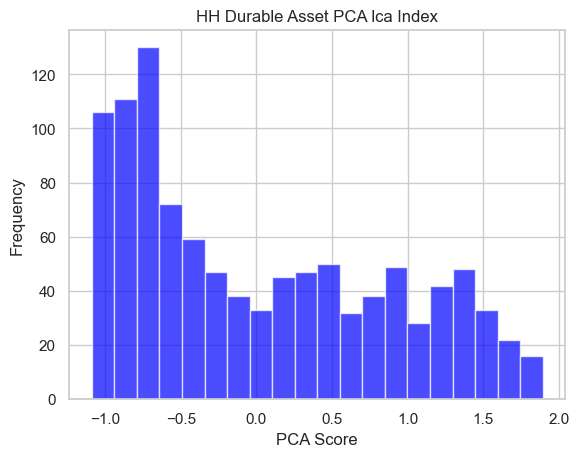

In [201]:
durable_assets = [
    'electricity', 'smt_phone', 'smt_phone_1p', 'tv', 'clock', 'impr_stove',
    'fridge', 'cooler', 'press_cook', 'wardrobe', 'matress', 'box_bed',
    'sofa', 'table', 'fan', 'computer', 'two_wheel', 'four_wheel', 'dugwell', 'wat_tank'
]
cor_matrix = df[durable_assets].corr()

# PCA 
cor_matrix += np.eye(len(durable_assets)) * 0.001
# Performing PCA on the correlation matrix
pca = PCA(n_components=1)
principal_components = pca.fit_transform(cor_matrix)
# Create the PCA index for observations
df['dur_a_index'] = pca.transform(df[durable_assets].fillna(0))[:, 0]  # Using fillna(0) for handling any NaNs

# label PCA index
df['dur_a_index'].rename("HH Durable Asset PCA lca Index")

# label PCA index
df['dur_a_index'].rename("HH Durable Asset PCA lca Index")
print(df[['dur_a_index']].head())

plt.hist(df['dur_a_index'], bins=20, color='blue', alpha=0.7)
plt.title('HH Durable Asset PCA lca Index')
plt.xlabel('PCA Score')
plt.ylabel('Frequency')
plt.show()

### vi) HH House Characteristics Index

In [202]:
house_chars = ['cem_house', 'toilet_in', 'pmt_floor', 'bathroom']
conversion_map = {'Yes': 1, 'No': 0}
df[house_chars] = df[house_chars].replace(conversion_map)
alpha = pg.cronbach_alpha(data=df[house_chars])
print(f"Cronbach's alpha for household characteristics: {alpha[0]:.4f}")

Cronbach's alpha for household characteristics: 0.4952


In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Compute the correlation matrix
corr_matrix = df[house_chars].corr()

# Normalize the data before PCA
scaler = StandardScaler()

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[house_chars])
features_scaled = scaler.fit_transform(df_imputed)

# Perform PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(features_scaled)

# Add the PCA index to the dataframe
df['house_char_index'] = principal_components[:, 0]
df['house_char_index'].rename("House Characteristics PCA Index")

print(df[['house_char_index']].head())


   house_char_index
0          1.098898
1         -0.013649
2          1.098898
3          1.098898
4          1.098898


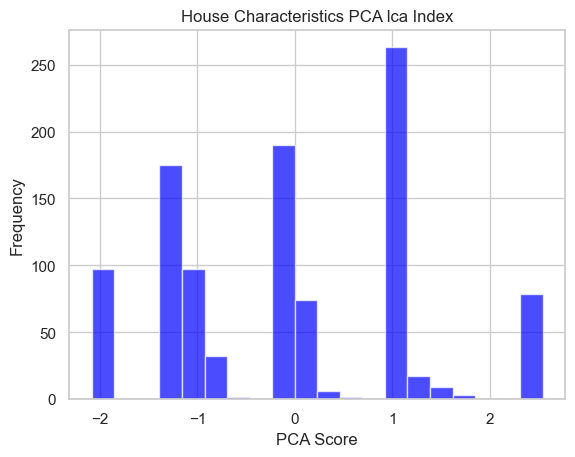

In [205]:
plt.hist(df['house_char_index'], bins=20, color='blue', alpha=0.7)
plt.title('House Characteristics PCA lca Index')
plt.xlabel('PCA Score')
plt.ylabel('Frequency')
plt.show()

### vii) Calculating the overall wealth Index

In [206]:
wealth_index_vars = [
    'cow_hh', 'cow_3p', 'bull_hh', 'bull_2p', 'buffalo_hh', 'buffalo_2p', 
    'goat_hh', 'goat_4p', 'poultry_hh', 'poultry_6p', 'tractor', 'mot_pump', 
    'thresher', 'cultivator', 'drp_irrig', 'sprinkler', 'electricity', 
    'smt_phone', 'smt_phone_1p', 'tv', 'clock', 'impr_stove', 'fridge', 
    'cooler', 'press_cook', 'wardrobe', 'matress', 'box_bed', 'sofa', 
    'table', 'fan', 'computer', 'two_wheel', 'four_wheel', 'dugwell', 
    'wat_tank', 'cem_house', 'toilet_in', 'pmt_floor', 'bathroom'
]

df_wealth_index = df[wealth_index_vars]
cronbach_alpha = pg.cronbach_alpha(data=df_wealth_index)
print(f"Cronbach's alpha for the overall wealth index: {cronbach_alpha[0]:.4f}")


Cronbach's alpha for the overall wealth index: 0.8123


In [207]:
# Calculate item-rest correlations
item_rest_corr = {}
for item in wealth_index_vars:
    rest_items = df[wealth_index_vars].drop(columns=item)
    rest_total = rest_items.sum(axis=1)
    correlation = df[item].corr(rest_total)
    item_rest_corr[item] = correlation

# Filter items based on item-rest correlation threshold
filtered_items = [item for item, corr in item_rest_corr.items() if corr >= 0.2]

print("Filtered Items based on item-rest correlation >= 0.2:", filtered_items)

# Calculate Cronbach's alpha for the filtered items
if filtered_items:
    cronbach_alpha = pg.cronbach_alpha(data=df[filtered_items])[0]
    print(f"Cronbach's alpha after filtering: {cronbach_alpha:.4f}")
else:
    print("No items left after filtering; cannot compute Cronbach's alpha.")


Filtered Items based on item-rest correlation >= 0.2: ['buffalo_hh', 'buffalo_2p', 'tractor', 'thresher', 'cultivator', 'electricity', 'smt_phone', 'smt_phone_1p', 'tv', 'clock', 'impr_stove', 'fridge', 'cooler', 'press_cook', 'wardrobe', 'matress', 'box_bed', 'sofa', 'table', 'fan', 'two_wheel', 'four_wheel', 'dugwell', 'wat_tank', 'toilet_in', 'pmt_floor', 'bathroom']
Cronbach's alpha after filtering: 0.8543


### Calculating the Wealth PCA Index

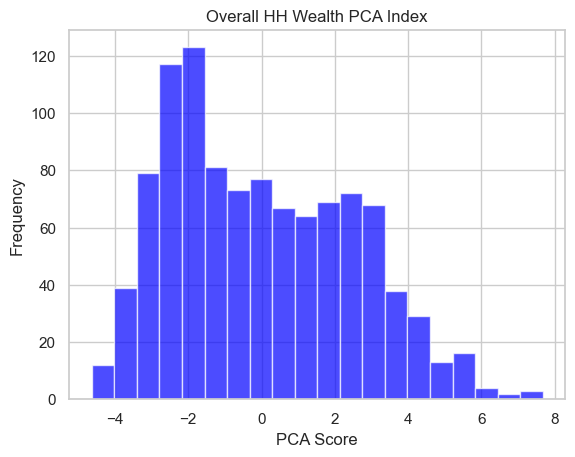

In [210]:

# listing the items
wealth_items = [
    'buffalo_hh', 'buffalo_2p', 'goat_hh', 'tractor', 'mot_pump', 'thresher',
    'cultivator', 'drp_irrig', 'sprinkler', 'electricity', 'smt_phone',
    'smt_phone_1p', 'tv', 'clock', 'impr_stove', 'fridge', 'cooler',
    'press_cook', 'wardrobe', 'matress', 'box_bed', 'sofa', 'table', 'fan',
    'computer', 'two_wheel', 'four_wheel', 'dugwell', 'wat_tank', 'cem_house',
    'toilet_in', 'pmt_floor', 'bathroom'
]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[wealth_items])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_imputed)

# Perform PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(features_scaled)

# Add the PCA index to the dataframe
df['wealth_index'] = principal_components[:, 0]

# Plotting
plt.hist(df['wealth_index'], bins=20, color='blue', alpha=0.7)
plt.title('Overall HH Wealth PCA Index')
plt.xlabel('PCA Score')
plt.ylabel('Frequency')
plt.show()


## MODULE 4: PARTICIPATION  IN GROUPS

### i) Participation in Groups

In [211]:
# Convert 'grp_par' from string to numeric, coercing errors to NaN (missing values)
df['grp_par'] = pd.to_numeric(df['grp_par'], errors='coerce')

# Replace all instances of 999 in 'grp_par' with NaN
df['grp_par'].replace(999, pd.NA, inplace=True)

# Generate new column 'grp_part_hh_any' where 1 if 'grp_par' equals 1, otherwise 0
df['grp_part_hh_any'] = (df['grp_par'] == 1).astype(int)

# Label the 'grp_part_hh_any' variable
df['grp_part_hh_any'].rename("HH participated in any group meetings")

# Convert 'grp_n' from string to numeric, coercing errors to NaN (missing values)
df['grp_n'] = pd.to_numeric(df['grp_n'], errors='coerce')



### ii) HH participates in more than 1 group

In [212]:
# Create a new column 'grp_hh_2p'
df['grp_hh_2p'] = pd.NA

# Set 'grp_hh_2p' to 1 where 'grp_n' is greater than 1 and not missing
df.loc[df['grp_n'] > 1, 'grp_hh_2p'] = 1

### iii) HH attended at least 2 group meetings in past year

In [213]:
# Recode values from 999 to NaN for each existing specified column
for i in range(1, 4):  # Changed from 6 to 4 because only meet_times_1 to meet_times_3 exist
    df[f'meet_times_{i}'] = df[f'meet_times_{i}'].replace(999, pd.NA)

# Convert all relevant 'grp_hh_mt_n_' columns from string to numeric
grp_hh_mt_cols = df.columns[df.columns.str.startswith('grp_hh_mt_n_')]
df[grp_hh_mt_cols] = df[grp_hh_mt_cols].apply(pd.to_numeric, errors='coerce')

# Initialize 'grp_hh_active' with NaN
df['grp_hh_active'] = pd.NA

# Set 'grp_hh_active' to 1 if any 'grp_hh_mt_n_' column values are greater than 3
condition = (df[grp_hh_mt_cols] > 3).any(axis=1)
df.loc[condition, 'grp_hh_active'] = 1

# Convert all relevant 'grp_act_' columns from string to numeric
grp_act_cols = df.columns[df.columns.str.startswith('grp_act_')]
df[grp_act_cols] = df[grp_act_cols].apply(pd.to_numeric, errors='coerce')


### iv)  group leadership 

In [214]:
# Convert 'grp_lead_1_*' columns from string to numeric
grp_lead_cols = df.columns[df.columns.str.startswith('grp_lead_1_')]
df[grp_lead_cols] = df[grp_lead_cols].apply(pd.to_numeric, errors='coerce')

# Initialize 'grp_hh_lead' with NaN and set to 1 where any 'grp_lead_1_' column equals 1
df['grp_hh_lead'] = pd.NA
df.loc[(df[grp_lead_cols] == 1).any(axis=1), 'grp_hh_lead'] = 1

# Convert 'rea_join_no' from string to numeric and define labels
df['rea_join_no'] = pd.to_numeric(df['rea_join_no'], errors='coerce')

###  v) Types of activities HH undertaken in the last 12 months to restore communal land

In [215]:
# Calculate means by state
state_names = {1: 'Gujarat', 2: 'Madhya Pradesh', 3: 'Uttar Pradesh'}
for key, value in state_names.items():
    mean_values = df[df['state_name'] == key][['grp_part_hh_any', 'grp_hh_active', 'grp_hh_lead']].mean()
    print(f"{value} means:\n{mean_values}\n")

Gujarat means:
grp_part_hh_any    0.108753
grp_hh_active           NaN
grp_hh_lead             1.0
dtype: object

Madhya Pradesh means:
grp_part_hh_any    0.508772
grp_hh_active           1.0
grp_hh_lead             1.0
dtype: object

Uttar Pradesh means:
grp_part_hh_any    0.221354
grp_hh_active           NaN
grp_hh_lead             1.0
dtype: object



###  MODULE 5: COPING STRATEGIES 

### i) Participation in Groups

In [216]:
# Convert 'grp_par' from string to numeric, coercing errors to NaN (missing values)
df['grp_par'] = pd.to_numeric(df['grp_par'], errors='coerce')

# Replace all instances of 999 in 'grp_par' with NaN
df['grp_par'].replace(999, pd.NA, inplace=True)

# Generate new column 'grp_part_hh_any' where 1 if 'grp_par' equals 1, otherwise 0
df['grp_part_hh_any'] = (df['grp_par'] == 1).astype(int)

# Label the 'grp_part_hh_any' variable
df['grp_part_hh_any'].rename("HH participated in any group meetings")

# Convert 'grp_n' from string to numeric, coercing errors to NaN (missing values)
df['grp_n'] = pd.to_numeric(df['grp_n'], errors='coerce')

### ii) HH participates in more than 1 group

In [217]:
# Create a new column 'grp_hh_2p'
df['grp_hh_2p'] = pd.NA

# Set 'grp_hh_2p' to 1 where 'grp_n' is greater than 1 and not missing
df.loc[df['grp_n'] > 1, 'grp_hh_2p'] = 1

### iii) HH attended at least 2 group meetings in past year

In [218]:
# Recode values from 999 to NaN for each specified column
for i in range(1, 4):
    df[f'meet_times_{i}'] = df[f'meet_times_{i}'].replace(999, pd.NA)

# Convert all relevant 'grp_hh_mt_n_' columns from string to numeric
grp_hh_mt_cols = df.columns[df.columns.str.startswith('grp_hh_mt_n_')]
df[grp_hh_mt_cols] = df[grp_hh_mt_cols].apply(pd.to_numeric, errors='coerce')

# Initialize 'grp_hh_active' with NaN
df['grp_hh_active'] = pd.NA

# Set 'grp_hh_active' to 1 if any 'grp_hh_mt_n_' column values are greater than 3
condition = (df[grp_hh_mt_cols] > 3).any(axis=1)
df.loc[condition, 'grp_hh_active'] = 1

# Convert all relevant 'grp_act_' columns from string to numeric
grp_act_cols = df.columns[df.columns.str.startswith('grp_act_')]
df[grp_act_cols] = df[grp_act_cols].apply(pd.to_numeric, errors='coerce')

### iv)  group leadership 

In [219]:
# Convert 'grp_lead_1_*' columns from string to numeric
grp_lead_cols = df.columns[df.columns.str.startswith('grp_lead_1_')]
df[grp_lead_cols] = df[grp_lead_cols].apply(pd.to_numeric, errors='coerce')

# Initialize 'grp_hh_lead' with NaN and set to 1 where any 'grp_lead_1_' column equals 1
df['grp_hh_lead'] = pd.NA
df.loc[(df[grp_lead_cols] == 1).any(axis=1), 'grp_hh_lead'] = 1

# Convert 'rea_join_no' from string to numeric and define labels
df['rea_join_no'] = pd.to_numeric(df['rea_join_no'], errors='coerce')

###  v) Types of activities HH undertaken in the last 12 months to restore communal land

In [220]:
# Calculate means by state
state_names = {1: 'Gujarat', 2: 'Madhya Pradesh', 3: 'Uttar Pradesh'}
for key, value in state_names.items():
    mean_values = df[df['state_name'] == key][['grp_part_hh_any', 'grp_hh_active', 'grp_hh_lead']].mean()
    print(f"{value} means:\n{mean_values}\n")

Gujarat means:
grp_part_hh_any    0.108753
grp_hh_active           NaN
grp_hh_lead             1.0
dtype: object

Madhya Pradesh means:
grp_part_hh_any    0.508772
grp_hh_active           1.0
grp_hh_lead             1.0
dtype: object

Uttar Pradesh means:
grp_part_hh_any    0.221354
grp_hh_active           NaN
grp_hh_lead             1.0
dtype: object



##  MODULE 5 COPING STRATEGIES 

#### i) Stress Coping

In [221]:
# Generate a new variable for animal-based coping strategies
df['lhcsicrpanimals'] = ((df['cs_item_3'] == 1) | (df['cs_item_4'] == 1)).astype(int)

# Initialize a stress coping variable
df['stress_coping'] = 0

# Define the list of variables related to stress
stress_vars = ['cs_item_1', 'lhcsicrpanimals', 'cs_item_6', 'cs_item_7']

# Iterate over the stress variables
for var in stress_vars:
    # Replace stress_coping to 1 where var is 1
    df.loc[df[var] == 1, 'stress_coping'] = 1
    
    # Generate a new weighted variable and initialize to 0
    df[var + '_w'] = 0
    
    # Replace the weighted variable to 2 where var is 1
    df.loc[df[var] == 1, var + '_w'] = 2
    

# Initialize a crisis coping variable
df['crisis_coping'] = 0

# Assume similar operations for crisis coping variables as stress coping, which are not defined in the given snippet.

# Print the DataFrame to check the changes
df.head()

,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,grp_hh_2p,grp_hh_active,grp_hh_lead,lhcsicrpanimals,stress_coping,cs_item_1_w,lhcsicrpanimals_w,cs_item_6_w,cs_item_7_w,crisis_coping
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,<NA>,<NA>,<NA>,0,0,0,0,0,0,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,<NA>,<NA>,<NA>,0,0,0,0,0,0,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,<NA>,<NA>,<NA>,0,0,0,0,0,0,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,<NA>,<NA>,<NA>,0,0,0,0,0,0,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,<NA>,<NA>,<NA>,0,0,0,0,0,0,0


### ii) Crisis Related Variables

In [222]:
# List of crisis-related variables 
crisis_vars = ['cs_item_13', 'cs_item_14', 'cs_item_15']  # Example variables

# Iterate over the crisis variables
for var in crisis_vars:
    # Update crisis_coping to 1 where var is 1
    df.loc[df[var] == 1, 'crisis_coping'] = 1
    
    # Generate a new weighted variable and initialize to 0
    df[var + '_w'] = 0
    
    # Replace the weighted variable to 3 where var is 1
    df.loc[df[var] == 1, var + '_w'] = 3
    


# Print the DataFrame to check the changes
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,lhcsicrpanimals,stress_coping,cs_item_1_w,lhcsicrpanimals_w,cs_item_6_w,cs_item_7_w,crisis_coping,cs_item_13_w,cs_item_14_w,cs_item_15_w
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,0,0,0,0,0,0,0,0,0,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


### iii) Emergency Coping

In [223]:
# Create a binary variable for animal-based coping strategies
df['lhcsifemanimal'] = ((df['cs_item_17'] == 1) | (df['cs_item_18'] == 1)).astype(int)

# Create a binary variable for mortgaging-related coping strategies
df['lhcsimortgaged'] = ((df['cs_item_16'] == 1) | (df['cs_item_19'] == 1)).astype(int)

# Create a binary variable for remittance-related coping strategies
df['lhcsiremittance'] = ((df['cs_item_23'] == 1) | (df['cs_item_22'] == 1) | (df['cs_item_23'] == 1)).astype(int)

# Initializing the Emergency Coping Indicator
df['emergency_coping'] = 0

# List of emergency-related variables
emergency_vars = ['lhcsimortgaged', 'lhcsiremittance', 'lhcsifemanimal']

# Iterate Over the Emergency Variables
for var in emergency_vars:
    # Set emergency_coping to 1 where any emergency-related variable is 1
    df.loc[df[var] == 1, 'emergency_coping'] = 1
    
    # Create a new weighted variable initialized to 0
    df[var + '_w'] = 0
    
    # Set the weighted variable to 4 where the emergency variable is 1
    df.loc[df[var] == 1, var + '_w'] = 4

df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,cs_item_13_w,cs_item_14_w,cs_item_15_w,lhcsifemanimal,lhcsimortgaged,lhcsiremittance,emergency_coping,lhcsimortgaged_w,lhcsiremittance_w,lhcsifemanimal_w
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,0,0,0,0,0,0,0,0,0,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


### iv) Constructing LCSI Column by summing up 

In [224]:
# Create a binary variable for animal-based coping strategies
df['lhcsifemanimal'] = ((df['cs_item_17'] == 1) | (df['cs_item_18'] == 1)).astype(int)

# Create a binary variable for mortgaging-related coping strategies
df['lhcsimortgaged'] = ((df['cs_item_16'] == 1) | (df['cs_item_19'] == 1)).astype(int)

# Create a binary variable for remittance-related coping strategies
df['lhcsiremittance'] = ((df['cs_item_23'] == 1) | (df['cs_item_22'] == 1) | (df['cs_item_23'] == 1)).astype(int)

# Initializing the Emergency Coping Indicator
df['emergency_coping'] = 0

# List of emergency-related variables
emergency_vars = ['lhcsimortgaged', 'lhcsiremittance', 'lhcsifemanimal']

# Iterate Over the Emergency Variables
for var in emergency_vars:
    # Set emergency_coping to 1 where any emergency-related variable is 1
    df.loc[df[var] == 1, 'emergency_coping'] = 1
    
    # Create a new weighted variable initialized to 0
    df[var + '_w'] = 0
    
    # Set the weighted variable to 4 where the emergency variable is 1
    df.loc[df[var] == 1, var + '_w'] = 4

df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,cs_item_13_w,cs_item_14_w,cs_item_15_w,lhcsifemanimal,lhcsimortgaged,lhcsiremittance,emergency_coping,lhcsimortgaged_w,lhcsiremittance_w,lhcsifemanimal_w
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,0,0,0,0,0,0,0,0,0,0
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,0,0
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


### v) Generating Maximum Coping Behavior

In [225]:
# Recoding Variables
df['stress_coping'] = df['stress_coping'].replace({0: 0, 1: 2})
df['crisis_coping'] = df['crisis_coping'].replace({0: 0, 1: 3})
df['emergency_coping'] = df['emergency_coping'].replace({0: 0, 1: 4})

# Generating Maximum Coping Behavior
df['max_coping_behaviour'] = df[['stress_coping', 'crisis_coping', 'emergency_coping']].max(axis=1)

# Recoding Maximum Coping Behavior
df['max_coping_behaviour'] = df['max_coping_behaviour'].replace({0: 1})

# Labeling and Defining Values for Maximum Coping Behavior
#  you can use a dictionary to achieve a similar result.
labels_max_coping = {
    1: "HH not adopting coping strategies",
    2: "Stress coping strategies",
    3: "crisis coping strategies",
    4: "emergencies coping strategies"
}

# Apply labels to the 'max_coping_behaviour' for output or analysis purposes by mapping the dictionary
df['max_coping_behaviour_label'] = df['max_coping_behaviour'].map(labels_max_coping)

# Print the DataFrame to check the new columns
df.head()

,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,cs_item_15_w,lhcsifemanimal,lhcsimortgaged,lhcsiremittance,emergency_coping,lhcsimortgaged_w,lhcsiremittance_w,lhcsifemanimal_w,max_coping_behaviour,max_coping_behaviour_label
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,1,HH not adopting coping strategies
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,0,0,0,0,0,0,0,0,1,HH not adopting coping strategies
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,1,HH not adopting coping strategies
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,0,0,0,0,0,0,0,0,1,HH not adopting coping strategies
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,0,0,0,0,0,0,0,0,1,HH not adopting coping strategies


## MODULE 6: PRODUCTS COLLECTED FROM COMMONS


### i) prodcuts collected from commons in 2023


In [227]:
# Convert 'pro_n_23' to numeric, forcing conversion
df['pro_n_23'] = pd.to_numeric(df['pro_n_23'], errors='coerce')

# Replace '999' with NaN
df['pro_n_23'] = df['pro_n_23'].replace(999, np.nan)


# Labels for reference
variable_labels = {
    'com_pro_23_1': "Firewood",
    'com_pro_23_2': "Timber/lumber",
    'com_pro_23_3': "Poles",
    'com_pro_23_4': "Bamboo",
    'com_pro_23_5': "Fodder/feed",
    'com_pro_23_6': "Tendu leaves",
    'com_pro_23_7': "Wild fruit/berries/nuts",
    'com_pro_23_8': "Tree pods and seeds",
    'com_pro_23_9': "Edible plants",
    'com_pro_23_10': "Wild animals (bush meat)",
    'com_pro_23_11': "Wild honey or wax",
    'com_pro_23_12': "Other food products like tubers or mushrooms",
    'com_pro_23_13': "Medicine plants",
    'com_pro_23_14': "Flowers",
    'com_pro_23_15': "Resins or oils",
    'com_pro_23_16': "Thatching material",
    'com_pro_23_17': "Manure",
    'com_pro_23_18': "Silt",
    'com_pro_23_19': "Stones",
    'com_pro_23_50': "Any other item(s)",
    'pro_n_23': "Number of products HHs collected from commons"
}

# Print the DataFrame to check the new columns and conversions
print(df.head())

# Optional: Print the labels for reference
for var, label in variable_labels.items():
    print(f"{var}: {label}")


           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                                                                    

                   

##  In how many months out of 12 the HHs collected prodcts from commons 

In [229]:


# List of month_n_* columns
month_columns = [
    'month_n_1', 'month_n_2', 'month_n_3', 'month_n_4', 'month_n_5', 'month_n_6', 
    'month_n_7', 'month_n_8', 'month_n_9', 'month_n_10', 'month_n_11', 'month_n_12', 
    'month_n_13', 'month_n_14', 'month_n_15', 'month_n_16', 'month_n_17', 'month_n_18', 
    'month_n_19', 'month_n_20'
]

# Convert columns to numeric, forcing conversion
df[month_columns] = df[month_columns].apply(pd.to_numeric, errors='coerce')

# Replace '999' with NaN
df[month_columns] = df[month_columns].replace(999, np.nan)

# Create a dictionary for labels (for reference, pandas does not support direct labeling)
variable_labels = {
    'month_n_1': "# of months collected Firewood",
    'month_n_2': "# of months collected Timber/lumber",
    'month_n_3': "# of months collected Poles",
    'month_n_4': "# of months collected Bamboo",
    'month_n_5': "# of months collected Fodder/feed",
    'month_n_6': "# of months collected Tendu leaves",
    'month_n_7': "# of months collected Wild fruit/berries/nuts",
    'month_n_8': "# of months collected Tree pods and seeds",
    'month_n_9': "# of months collected Edible plants",
    'month_n_10': "# of months collected Wild animals (bush meat)",
    'month_n_11': "# of months collected Wild honey or wax",
    'month_n_12': "# of months collected Other food products like tubers or mushrooms",
    'month_n_13': "# of months collected Medicine plants",
    'month_n_14': "# of months collected Flowers",
    'month_n_15': "# of months collected Resins or oils",
    'month_n_16': "# of months collected Thatching material",
    'month_n_17': "# of months collected Manure",
    'month_n_18': "# of months collected Silt",
    'month_n_19': "# of months collected Stones",
    'month_n_20': "# of months collected Any other item(s)"
}

# Summarize the data for each month_n column
summary = {}
for col in month_columns:
    summary[col] = df[col].dropna().describe()

# Print the summary statistics for each column
for col, stats in summary.items():
    print(f"Summary for {col}: {variable_labels.get(col, '')}")
    print(stats)
    print()

# Print the first few rows of the DataFrame to verify changes
print(df.head())


Summary for month_n_1: # of months collected Firewood
count    151.000000
mean       4.231788
std        1.884830
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: month_n_1, dtype: float64

Summary for month_n_2: # of months collected Timber/lumber
count    3.000000
mean     2.333333
std      0.577350
min      2.000000
25%      2.000000
50%      2.000000
75%      2.500000
max      3.000000
Name: month_n_2, dtype: float64

Summary for month_n_3: # of months collected Poles
count    16.000000
mean      3.437500
std       2.502499
min       1.000000
25%       2.000000
50%       2.500000
75%       4.250000
max      10.000000
Name: month_n_3, dtype: float64

Summary for month_n_4: # of months collected Bamboo
count    1.0
mean     2.0
std      NaN
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
Name: month_n_4, dtype: float64

Summary for month_n_5: # of months collected Fodder/feed
count     3.000000
mean      7.0000

##  Who collected firewood

In [230]:


# Convert col_who_*_1 columns to numeric, forcing conversion
for x in range(1, 20):
    col_name = f'col_who_{x}_1'
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Initialize col_firewood_who with NaN
df['col_firewood_who'] = np.nan

# Update col_firewood_who based on specified conditions
for x in range(2, 20):
    col_who_name = f'col_who_{x}_1'
    mem_sex_name = f'mem_sex_{x}'
    mem_age_name = f'mem_age_{x}'
    
    # Replace col_firewood_who with 1 if conditions are met
    df.loc[(df[col_who_name] == 1) & (df[mem_sex_name] == 1) & (df[mem_age_name] > 17), 'col_firewood_who'] = 1
    
    # Replace col_firewood_who with 0 if conditions are met
    df.loc[(df[col_who_name] == 1) & (df[mem_sex_name] == 0) & (df[mem_age_name] > 17), 'col_firewood_who'] = 0

# Label for reference (pandas does not support direct labeling)
variable_labels = {
    'col_firewood_who': "Gender of HHs who collected firewood from commons"
}

# Print the changes to verify
print(df[['col_firewood_who']].head())

# Optional: Print the labels for reference
for var, label in variable_labels.items():
    print(f"{var}: {label}")


   col_firewood_who
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
col_firewood_who: Gender of HHs who collected firewood from commons


## Products used for

In [231]:


# Generate prod_domest_use, prod_sale, and prod_traded columns initialized with NaN
df['prod_domest_use'] = np.nan
df['prod_sale'] = np.nan
df['prod_traded'] = np.nan

# Convert use_what_*_* columns to numeric, forcing conversion
for x in range(1, 4):
    for j in range(1, 20):
        col_name = f'use_what_{x}_{j}'
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Update prod_domest_use, prod_sale, and prod_traded based on specified conditions
for x in range(1, 20):
    df.loc[df[f'use_what_1_{x}'] == 1, 'prod_domest_use'] = 1
    df.loc[df[f'use_what_2_{x}'] == 1, 'prod_sale'] = 1
    df.loc[df[f'use_what_3_{x}'] == 1, 'prod_traded'] = 1

# Labels for reference (pandas does not support direct labeling)
variable_labels = {
    'prod_domest_use': "Used for domestic needs",
    'prod_sale': "Sold",
    'prod_traded': "Traded for other products"
}

# Print the changes to verify
print(df[['prod_domest_use', 'prod_sale', 'prod_traded']].head())

# Optional: Print the labels for reference
for var, label in variable_labels.items():
    print(f"{var}: {label}")


   prod_domest_use  prod_sale  prod_traded
0              NaN        NaN          NaN
1              NaN        NaN          NaN
2              NaN        NaN          NaN
3              NaN        NaN          NaN
4              1.0        NaN          NaN
prod_domest_use: Used for domestic needs
prod_sale: Sold
prod_traded: Traded for other products


###  HHs with livestock grazed on common land in your village


In [232]:

# Dictionary for percentage category labels
per_cat_labels = {
    1: "All (100%)",
    2: "Most (more than 65% or two-thirds)",
    3: "About half (41-65%)",
    4: "About one-third (21-40%)",
    5: "Small amount (10-20%)",
    6: "Very small amount (less than 10%)",
    7: "None"
}

# Apply the labels to the relevant columns
for x in range(1, 20):
    col_name = f'dom_req_per_{x}'
    if col_name in df.columns:
        df[f'{col_name}_label'] = df[col_name].map(per_cat_labels)

# Print the first few rows of the DataFrame to check the new labeled columns
print(df.head())

# Print the labels for reference
for x in range(1, 20):
    col_name = f'dom_req_per_{x}'
    if col_name in df.columns:
        print(f"Labels for {col_name}:")
        print(df[[col_name, f'{col_name}_label']].dropna().head())
        print()


           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                                                                    

                   

##  MODULE 7: FARM SKETCH

### i)  Number of fielda HH cultivated 

In [233]:


# Dictionary for yes/no labels
yes_no_labels = {
    0: "No",
    1: "Yes"
}

# Convert relevant columns to numeric, forcing conversion
columns_to_convert = ['f_own_hh', 'f_lease_out', 'f_lease_in', 'f_unprod']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply labels to the relevant columns (for reference, pandas does not support direct labeling)
for col in columns_to_convert:
    if col in df.columns:
        df[f'{col}_label'] = df[col].map(yes_no_labels)

# Create a dictionary for variable labels
variable_labels = {
    'fields_cult_2021': "Number of fields hh cultivated since Rabi 2020",
    'f_kharif': "At least 1 cropping or horticultural field under cultivation",
    'f_own_hh': "HH owned at least 1 cropping or horticultural field",
    'f_lease_out': "HH leased out at least 1 cropping or horti field",
    'f_lease_in': "HH leased in at least 1 cropping or horti field",
    'f_unprod': "HH owned at least 1 field or garden under fallow"
}

# Print the first few rows of the DataFrame to check the new labeled columns
print(df.head())

# Print the labels for reference
for var, label in variable_labels.items():
    if var in df.columns or var in df.columns.str.replace('_label', ''):
        print(f"{var}: {label}")

# Optional: Print the new labeled columns
for col in columns_to_convert:
    if col in df.columns:
        print(f"Labels for {col}:")
        print(df[[col, f'{col}_label']].dropna().head())
        print()


           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                                                                    

                   

### ii)  land leased out 

In [234]:


# Convert strings to numeric for leased out fields and sum them
for x in range(1, 4):  # Range based on your STATA code f_lo_size_1 to f_lo_size_3
    col_name = f'f_lo_size_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Summing the specified columns to create a new column for total size leased out
df['f_lo_size'] = df[[f'f_lo_size_{i}' for i in range(1, 4) if f'f_lo_size_{i}' in df.columns]].sum(axis=1)

# Convert strings to numeric for unproductive fields and sum them
for x in range(1, 3):  # Range based on your STATA code f_un_pro_size_1 to f_un_pro_size_2
    col_name = f'f_un_pro_size_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Summing the specified columns to create a new column for total unproductive size
df['f_un_pro_size'] = df[[f'f_un_pro_size_{i}' for i in range(1, 3) if f'f_un_pro_size_{i}' in df.columns]].sum(axis=1)
df[['f_lo_size', 'f_un_pro_size']]


,f_lo_size,f_un_pro_size
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1041,0.0,0.0
1042,0.0,0.0
1043,0.0,0.0
1044,0.0,0.0


### iii) why left fallow?

In [235]:
# putting the reasons in a dictionary and encoding
no_pro_reasons = {
    1: "Unfavourable weather conditions during 2018 Kharif",
    2: "Lack of resources/credit to purchase inputs for cultivation",
    3: "Inputs not available on time",
    4: "Irrigation facilities not in place",
    5: "Land unproductive, so not worth investing in",
    6: "To replenish its fertility",
    7: "Other reason"
}

# Loop over the reasons and their subcategories
for x in range(1, 8):  # There are 7 reasons
    for i in range(1, 3):  # Each reason has 2 subcategories
        column_name = f'no_pro_rea_{x}_{i}'
        if column_name in df.columns:
            # Convert string to numeric, replacing non-convertible values with NaN
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            # Label the column (for documentation, storing labels in a dict associated with the DataFrame)
            df[column_name].attrs['label'] = no_pro_reasons[x]



## MODULE 8 FIELD PROFILES

### i) Farm size in acare

In [236]:
# Step 1: Convert f_size_x and f_size2_x columns to numeric
for x in range(1, 7):
    f_size_col = f'f_size_{x}'
    f_size2_col = f'f_size2_{x}'
    if f_size_col in df.columns:
        df[f_size_col] = pd.to_numeric(df[f_size_col], errors='coerce')
    if f_size2_col in df.columns:
        df[f_size2_col] = pd.to_numeric(df[f_size2_col], errors='coerce')

# Display the DataFrame after converting columns to numeric
print("DataFrame after converting f_size_x and f_size2_x columns to numeric:")
print(df.head())

# Step 2: Replace values in f_size_x with f_size2_x if f_size_x is NaN
for x in range(1, 7):
    f_size_col = f'f_size_{x}'
    f_size2_col = f'f_size2_{x}'
    if f_size_col in df.columns and f_size2_col in df.columns:
        df[f_size_col].fillna(df[f_size2_col], inplace=True)

# Display the DataFrame after replacing NaN values in f_size_x
print("\nDataFrame after replacing NaN values in f_size_x with f_size2_x:")
print(df.head())

# Step 3: Recode f_size_x to replace 999 with NaN
for x in range(1, 7):
    f_size_col = f'f_size_{x}'
    if f_size_col in df.columns:
        df[f_size_col].replace(999, np.nan, inplace=True)

# Display the DataFrame after recoding 999 to NaN
print("\nDataFrame after recoding 999 to NaN in f_size_x columns:")
print(df.head())

# Step 4: Calculate the total farm size across all f_size_x columns
f_size_cols = [f'f_size_{x}' for x in range(1, 7) if f'f_size_{x}' in df.columns]
df['f_size_total'] = df[f_size_cols].sum(axis=1)

# Display the DataFrame after calculating total farm size
print("\nDataFrame after calculating total farm size:")
print(df[['f_size_total'] + f_size_cols].head())

# Label the new column
df['f_size_total'].attrs['label'] = "Total HH field size in ACRE"

# Verify the label
print("\nLabel of f_size_total column:")
print(df['f_size_total'].attrs['label'])

DataFrame after converting f_size_x and f_size2_x columns to numeric:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                   

### ii) Plot Land Size

count    1046.000000
mean        2.497744
std         2.262453
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: f_size_total, dtype: float64


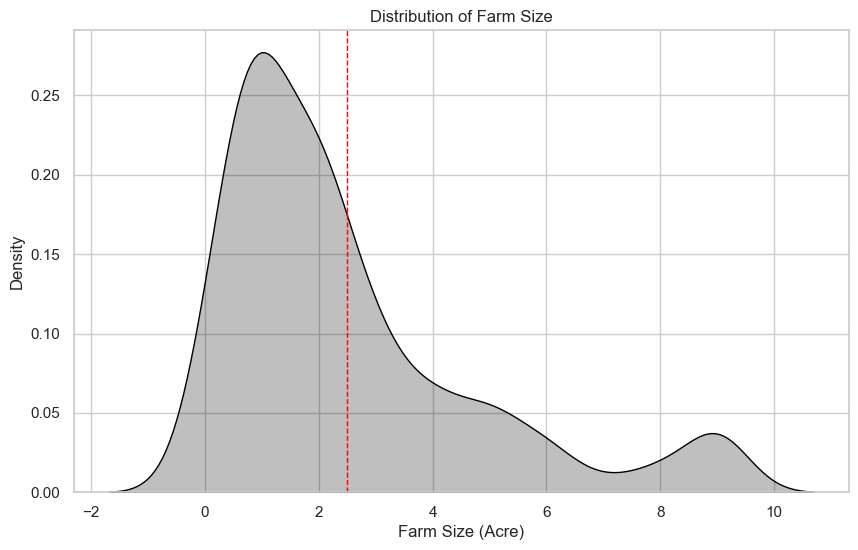

In [238]:
# Assuming df is your DataFrame

# Calculate the 25th and 75th percentiles and IQR
q25 = df['f_size_total'].quantile(0.25)
q75 = df['f_size_total'].quantile(0.75)
iqr = q75 - q25

# Define upper and lower bounds for outliers
upper_bound = q75 + 3 * iqr
lower_bound = q25 - 3 * iqr

# Replace outliers
df['f_size_total'] = np.where(df['f_size_total'] > upper_bound, upper_bound, df['f_size_total'])
df['f_size_total'] = np.where(df['f_size_total'] < lower_bound, lower_bound, df['f_size_total'])

# Recalculate the mean after adjusting for outliers
mean_size = df['f_size_total'].mean()


new_summary_stats = df['f_size_total'].describe()
mean_size = new_summary_stats['mean']
print(new_summary_stats)


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the density plot
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df['f_size_total'], color="black", fill=True)

# Add a line for the mean
plt.axvline(mean_size, color='red', linestyle='--', linewidth=1)

# Set titles and labels
plt.title('Distribution of Farm Size')
plt.xlabel('Farm Size (Acre)')
plt.ylabel('Density')

# Set background color
ax.set_facecolor('white')
plt.grid(True)  # Ensuring the grid is visible

plt.show()

### iii) Land Ownership

In [240]:
df['f_own_hh'] = pd.to_numeric(df['f_own_hh'], errors='coerce')


### iv) Who decides on how field managed and used

In [241]:


# Step 1: Convert f_own_decides_j_x columns to numeric
for j in range(1, 19):
    for x in range(1, 7):
        col_name = f'f_own_decides_{j}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Step 2: Generate f_own_decides_fem and f_own_decides_male columns and initialize with NaN
df['f_own_decides_fem'] = np.nan
df['f_own_decides_male'] = np.nan

# Step 3: Update f_own_decides_fem and f_own_decides_male based on conditions
for x in range(1, 19):
    conditions_fem = (
        (df[f'f_own_decides_{x}_1'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_2'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_3'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_4'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_5'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_6'] == 1) & (df[f'mem_sex_{x}'] == 1) & (df[f'mem_age_{x}'] > 17)
    )
    df.loc[conditions_fem, 'f_own_decides_fem'] = 1
    
    conditions_male = (
        (df[f'f_own_decides_{x}_1'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_2'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_3'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_4'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_5'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17) |
        (df[f'f_own_decides_{x}_6'] == 1) & (df[f'mem_sex_{x}'] == 0) & (df[f'mem_age_{x}'] > 17)
    )
    df.loc[conditions_male, 'f_own_decides_male'] = 1

# Step 4: Replace NaN values with 0 in f_own_decides_fem and f_own_decides_male
df['f_own_decides_fem'].fillna(0, inplace=True)
df['f_own_decides_male'].fillna(0, inplace=True)

# Step 5: Create f_own_decides_joint column and update it
df['f_own_decides_joint'] = 0
df.loc[(df['f_own_decides_fem'] == 1) & (df['f_own_decides_male'] == 1), 'f_own_decides_joint'] = 1

# Step 6: Convert f_cul_years_x and f_year_value_x columns to numeric and map years
years_mapping = {
    1: "2024", 2: "2023", 3: "2022", 4: "2021", 5: "2020", 6: "2019", 7: "2018", 8: "before 2017"
}

for x in range(1, 7):
    f_cul_years_col = f'f_cul_years_{x}'
    f_year_value_col = f'f_year_value_{x}'
    if f_cul_years_col in df.columns:
        df[f_cul_years_col] = pd.to_numeric(df[f_cul_years_col], errors='coerce')
        df[f_cul_years_col] = df[f_cul_years_col].map(years_mapping)
    if f_year_value_col in df.columns:
        df[f_year_value_col] = pd.to_numeric(df[f_year_value_col], errors='coerce')

# Display the DataFrame after processing
print("DataFrame after processing f_own_decides and f_cul_years/f_year_value columns:")
print(df.head())

# Display specific columns to verify
print("\nVerification of f_own_decides_fem, f_own_decides_male, and f_own_decides_joint columns:")
print(df[['f_own_decides_fem', 'f_own_decides_male', 'f_own_decides_joint']].head())

print("\nVerification of f_cul_years_x and f_year_value_x columns:")
for x in range(1, 7):
    print(f"f_cul_years_{x} and f_year_value_{x}:")
    print(df[[f'f_cul_years_{x}', f'f_year_value_{x}']].head())




DataFrame after processing f_own_decides and f_cul_years/f_year_value columns:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4          

### v) Soil Fertility

In [242]:
soil_fer_labels = {1: "Low", 2: "Medium", 3: "High"}

# Convert all f_soil_fert prefixed columns from string to numeric
for x in range(1, 7):
    col_name = f'f_soil_fert_{x}'
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')  # 'force' equivalent in pandas

# Apply the labels to each of these columns
for x in range(1, 7):
    col_name = f'f_soil_fert_{x}'
    df[col_name] = df[col_name].replace(soil_fer_labels)

### vi) Soil Quality Change

In [245]:

# Category labels for soil fertility change direction
change_scale_mapping = {
    1: "Significant improvement",
    2: "Moderate improvement",
    3: "Small improvement",
    4: "Small decline",
    5: "Moderate decline",
    6: "Significant decline"
}

# Define years mapping if necessary (assuming 'years' is already defined)
years_mapping = {  # Assuming you have a similar mapping from previous code
    1: "2024", 2: "2023", 3: "2022", 4: "2021", 5: "2020", 6: "2019", 7: "2018", 8: "before 2017"
}




In [246]:

# Apply the scale mapping to each soil fertility direction variable
for x in range(1, 7):
    col_name = f'soil_fert_ch_dir_{x}'
    if col_name in df.columns:
        df[col_name] = df[col_name].map(change_scale_mapping)

# Initialize the general soil fertility change column
df['soil_fert_chg'] = pd.NA

# Determine improvement or decline based on the mapping
for x in range(1, 7):
    col_name = f'soil_fert_ch_dir_{x}'
    if col_name in df.columns:
        # Set to 1 if condition of improvement is met
        df.loc[(df[col_name].isin(["Significant improvement", "Moderate improvement", "Small improvement"])), 'soil_fert_chg'] = 1
        # Set to 0 if condition of decline is met
        df.loc[(df[col_name].isin(["Small decline", "Moderate decline", "Significant decline"])), 'soil_fert_chg'] = 0

# Define the label for the soil_fert_chg column
soil_fert_chg_labels = {1: "Improved", 0: "Declined"}
df['soil_fert_chg'] = df['soil_fert_chg'].map(soil_fert_chg_labels)

# Apply years mapping to soil fertility change year variables, if applicable
for x in range(1, 7):
    year_col = f'soil_fert_ch_yr_{x}'
    if year_col in df.columns:
        df[year_col] = df[year_col].map(years_mapping).astype('category')


### vii) Land Slope

In [247]:
# Define the labels for land form (slope)
land_form_labels = {
    1: "Level or nearly level",
    2: "Sloping (around 5-10% gradient)",
    3: "Steep (more than 10% gradient)",
    4: "Composite (mixed)"
}

# Define the labels for number of trees
tree_n_labels = {
    1: "1 to 2",
    2: "3 to 5",
    3: "6 to 10",
    4: "11 to 20",
    5: "21 to 50",
    6: "51 to 100",
    7: "101 to 200",
    8: "201 to 500",
    9: "Over 500"
}

# Convert strings to numeric and apply labels for land slope and tree counts
for x in range(1, 7):
    # If you have columns like `land_form_x` you would map labels similarly to `f_tree_n_x` below

    # Convert tree count data from string to numeric
    df[f'f_tree_{x}'] = pd.to_numeric(df[f'f_tree_{x}'], errors='coerce')
    df[f'f_tree_n_{x}'] = pd.to_numeric(df[f'f_tree_n_{x}'], errors='coerce')

    # Apply labels for tree counts
    df[f'f_tree_n_{x}'] = df[f'f_tree_n_{x}'].map(tree_n_labels).fillna(df[f'f_tree_n_{x}'])

### viii) Tree Types

In [248]:
# Loop through variables and convert strings to numeric
for x in range(1, 6):
    for j in range(1, 4):
        # Variables from f_tree_typ_x_j to f_tree_typ_24_x_j
        col_name = f'f_tree_typ_{x}_{j}'
        col_name_24 = f'f_tree_typ_24_{x}_{j}'
        
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        if col_name_24 in df.columns:
            df[col_name_24] = pd.to_numeric(df[col_name_24], errors='coerce')

In [249]:
# Mapping based on previous discussion or example
per_cat = {
    1: "Category_1",
    2: "Category_2",
    3: "Category_3",
    # Add other categories as needed
}

for x in range(1, 7):  # Adjust based on actual range needed
    tree_col = f'f_tree_6y_{x}'
    if tree_col in df.columns:
        df[tree_col] = pd.to_numeric(df[tree_col], errors='coerce')
        # Apply categorical labels if needed and possible
        df[tree_col] = df[tree_col].map(per_cat).astype('category')

### ix) Tree Arrangement

In [250]:
# Definitions for tree planting patterns
planting_patterns = {
    1: "only 1 to 2 trees",
    2: "along boundaries",
    3: "clustered in one or more particular sections as patches",
    4: "at random locations, with large spacing (over 20m) in between",
    5: "at random locations in no particular organized way, with medium spacing (10-20 meters)",
    6: "interspersed in unorganized way but with tighter spacing (under 10 meters)",
    7: "planted in rows/hedges with medium spacing (10-20 meters)",
    8: "planted in rows/hedges with tighter spacing (under 10 meters)",
    9: "planted on contour bunds/earth ridges with medium or tight spacing",
    10: "planted as wind breaks with medium or tight spacing",
    11: "other"
}

# Tree change descriptions
tree_chg_descriptions = {
    1: "Number of trees",
    2: "Type of trees",
    3: "Arrangement of trees"
}


In [251]:

# Convert strings to numeric and document the tree arrangement descriptions
for x in range(1, 7):  # Loop through sets of tree types
    for j in range(1, 12):  # Loop through specific descriptions
        col_names = [f'f_plant_pat_tree_{j}_{x}', f'f_plant_pat_tree_24_{j}_{x}']
        for col in col_names:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                # Add label to column metadata (not directly visible, but retrievable)
                df[col].attrs['label'] = planting_patterns[j]

# Handling tree change categories
for x in range(1, 4):  # Loop through types of tree changes
    for j in range(1, 7):  # Loop through sets
        col = f'tree_chg_{x}_{j}'
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Apply categorical labels based on defined descriptions
            df[col] = df[col].map(tree_chg_descriptions).astype('category')

# Convert additional tree number data and apply labels
for x in range(1, 7):
    col = f'f_tree_n_24_{x}'
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Assuming tree_n mapping is defined somewhere or use default descriptions
        df[col] = df[col].map(tree_chg_descriptions).astype('category')


### x) Soil Conservation

In [252]:
# Soil conservation methods descriptions
soil_conservation = {
    1: "Terraces",
    2: "Contour ridges/bunds",
    3: "Field boundary bunds",
    4: "Water harvesting/farm pond",
    5: "Check dam",
    6: "Gully checks/plugs",
    7: "Other"
}


In [253]:


for x in range(1, 7):
    # Check and convert f_soil_con_x if exists
    soil_con_col = f'f_soil_con_{x}'
    if soil_con_col in df.columns:
        df[soil_con_col] = pd.to_numeric(df[soil_con_col], errors='coerce')
    
    # Check and convert f_soil_con_24_x if exists
    soil_con_24_col = f'f_soil_con_24_{x}'
    if soil_con_24_col in df.columns:
        df[soil_con_24_col] = pd.to_numeric(df[soil_con_24_col], errors='coerce')

    for j in range(1, 8):
        # Handling types of soil conservation for both sets
        con_type_col = f'f_soil_con_typ_{j}_{x}'
        con_type_24_col = f'f_soil_con_typ_24_{j}_{x}'

        if con_type_col in df.columns:
            df[con_type_col] = pd.to_numeric(df[con_type_col], errors='coerce')
            # Optionally, document the label
            df[con_type_col].attrs['label'] = soil_conservation[j]  # Assuming soil_conservation is a predefined dict

        if con_type_24_col in df.columns:
            df[con_type_24_col] = pd.to_numeric(df[con_type_24_col], errors='coerce')
            # Optionally, document the label
            df[con_type_24_col].attrs['label'] = soil_conservation[j]  # Assuming soil_conservation is a predefined dict



### xi) Crop List Kharif 2023

In [254]:
# Crop list mappings
crop_list = {
    1: "Paddy rice", 2: "Cotton", 3: "Chillies", 4: "Maize", 5: "Redgram", 6: "Greengram",
    7: "Blackgram", 8: "Common bean", 9: "Tobacco", 10: "Turmeric", 11: "Groundnut",
    12: "Soybean", 13: "Jowar (Sorghum)", 14: "Bajra (Pearl Millet)", 15: "Ragi (Finger Millet)",
    16: "Sunflower", 17: "Castor", 18: "Chick pea", 19: "Sessamun", 20: "Sugarcane",
    21: "Wheat", 22: "Mustard", 23: "Banana", 24: "Papaya", 25: "Mango", 26: "Citrus",
    27: "Jack Fruit", 28: "Sapota", 29: "Apple", 30: "Custard apple", 31: "Water melon",
    32: "Guava", 33: "Coconut", 34: "Cashew", 35: "Oil palm", 36: "Hemp", 37: "Cocoa",
    38: "Coffee", 39: "Tomato", 40: "Other vegetables", 41: "Flowers", 42: "Timber trees",
    43: "Fodder shrubs/trees", 44: "Other"
}


In [255]:

# Convert strings to numeric for crop variables and apply labels
for x in range(1, 45):
    for j in range(1, 7):
        col_name = f'crop_var_23_{x}_{j}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            # Optionally, document the label
            df[col_name].attrs['label'] = crop_list[x]  # Using attributes for documentation


In [256]:
# Specific replacements for certain crop names
tuvar_aliases = ["Tuvar", "Tuver.adad.papdi.", "Tuver", "Tuwar"]
moong_aliases = ["Moong", "Mung"]

for x in range(1, 7):
    other_col = f'crop_var_23_oth_{x}'
    if other_col in df.columns:
        # Replace values for Tuvar aliases
        df[f'crop_var_23_5_{x}'] = df[other_col].apply(lambda val: 1 if val in tuvar_aliases else df.get(f'crop_var_23_5_{x}', pd.Series([pd.NA])).iloc[0])
        # Replace values for Moong aliases
        df[f'crop_var_23_6_{x}'] = df[other_col].apply(lambda val: 1 if val in moong_aliases else df.get(f'crop_var_23_6_{x}', pd.Series([pd.NA])).iloc[0])


### xii) No of Crop Variaities Grown

In [257]:
# Convert crop variety numbers to numeric
for j in range(1, 7):
    col_name = f'crop_n_23_{j}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

### xiii)  Area allocated to each crop in acre

In [258]:
# Assigning proportional areas based on f_prod_per_x values
for x in range(1, 7):
    df[f'f_prod_p_{x}'] = 0  # Initialize with 0
    conditions = [
        df[f'f_prod_per_{x}'] == 1,
        df[f'f_prod_per_{x}'] == 2,
        df[f'f_prod_per_{x}'] == 3,
        df[f'f_prod_per_{x}'] == 4,
        df[f'f_prod_per_{x}'] == 5,
        df[f'f_prod_per_{x}'] == 6,
        df[f'f_prod_per_{x}'] == 7
    ]
    choices = [1, 2/3, 1/2, 1/3, 1/6, 1/10, 0]
    df[f'f_prod_p_{x}'] = np.select(conditions, choices, default=0)

In [259]:
# Calculate farm sizes for each crop
for x in range(1, 44):  # Assuming crops are indexed from 1 to 43
    for j in range(1, 7):  # Assuming fields are indexed from 1 to 6
        df[f'farm_size_crp_{x}_{j}'] = df[f'crop_var_23_{x}_{j}'] * df[f'f_size_{j}'] * df[f'f_prod_p_{j}']


In [260]:
# Aggregate farm sizes for each crop into a total size per crop
for x in range(1, 44):
    df[f'farm_size_crp_tot_{x}'] = df[[f'farm_size_crp_{x}_{j}' for j in range(1, 7)]].sum(axis=1)
    df[f'farm_size_crp_tot_{x}'].rename(f"area allocated to {crop_list.get(x, 'Unknown Crop')}", inplace=True)


In [261]:
# Sum all crop totals to check against the overall farm size
df['crop_area_tot'] = df[[f'farm_size_crp_tot_{x}' for x in range(1, 44)]].sum(axis=1)


In [262]:
# Initialize f_prod_p_x columns and replace values based on conditions
for x in range(1, 7):
    prod_col = f'f_prod_p_{x}'
    perc_col = f'f_prod_per_{x}'
    
    if perc_col in df.columns:
        df[prod_col] = 0
        df.loc[df[perc_col] == 1, prod_col] = 1
        df.loc[df[perc_col] == 2, prod_col] = 2 / 3
        df.loc[df[perc_col] == 3, prod_col] = 1 / 2
        df.loc[df[perc_col] == 4, prod_col] = 1 / 3
        df.loc[df[perc_col] == 5, prod_col] = 1 / 6
        df.loc[df[perc_col] == 6, prod_col] = 1 / 10
        df.loc[df[perc_col] == 7, prod_col] = 0

In [263]:
# Create new columns for farm size allocation
for x in range(1, 44):  # crop_var_23_x_j ranges from 1 to 43
    for j in range(1, 7):  # for each j from 1 to 6
        crop_col = f'crop_var_23_{x}_{j}'
        size_col = f'f_size_{j}'
        prod_col = f'f_prod_p_{j}'
        farm_size_col = f'farm_size_crp_{x}_{j}'
        
        if crop_col in df.columns and size_col in df.columns and prod_col in df.columns:
            df[farm_size_col] = df[crop_col] * df[size_col] * df[prod_col]


In [264]:
# Calculate row totals for each crop and label them
crop_list = {
    1: "Paddy rice", 2: "Cotton", 3: "Chillies", 4: "Maize", 5: "Redgram", 6: "Greengram",
    7: "Blackgram", 8: "Common bean", 9: "Tobacco", 10: "Turmeric", 11: "Groundnut",
    12: "Soybean", 13: "Jowar (Sorghum)", 14: "Bajra (Pearl Millet)", 15: "Ragi (Finger Millet)",
    16: "Sunflower", 17: "Castor", 18: "Chick pea", 19: "Sessamun", 20: "Sugarcane",
    21: "Wheat", 22: "Mustard", 23: "Banana", 24: "Papaya", 25: "Mango", 26: "Citrus",
    27: "Jack Fruit", 28: "Sapota", 29: "Apple", 30: "Custard apple", 31: "Water melon",
    32: "Guava", 33: "Coconut", 34: "Cashew", 35: "Oil palm", 36: "Hemp", 37: "Cocoa",
    38: "Coffee", 39: "Tomato", 40: "Other vegetables", 41: "Flowers", 42: "Timber trees",
    43: "Fodder shrubs/trees", 44: "Other"
}

for x in range(1, 44):
    farm_size_cols = [f'farm_size_crp_{x}_{j}' for j in range(1, 7) if f'farm_size_crp_{x}_{j}' in df.columns]
    if farm_size_cols:
        df[f'farm_size_crp_tot_{x}'] = df[farm_size_cols].sum(axis=1)
        df[f'farm_size_crp_tot_{x}'].attrs['label'] = f"area allocated to {crop_list[x]}"


### xiv) Total Cropped area accross all firm size

In [265]:


# Calculate the total farm size as the sum of all f_size_x columns
farm_size_columns = [f'f_size_{x}' for x in range(1, 7) if f'f_size_{x}' in df.columns]
df['total_farm_size'] = df[farm_size_columns].sum(axis=1)

In [266]:
# Calculate the total crop area by summing all farm_size_crp_tot_x columns
crop_area_columns = [f'farm_size_crp_tot_{x}' for x in range(1, 44) if f'farm_size_crp_tot_{x}' in df.columns]
df['crop_area_tot'] = df[crop_area_columns].sum(axis=1)


In [267]:
# Compare total crop area with total farm size
df['exceeds_farm_size'] = df['crop_area_tot'] > df['total_farm_size']

# Output rows where total crop area exceeds the total farm size
exceeds_farm_size_df = df[df['exceeds_farm_size']]
print(exceeds_farm_size_df[['total_farm_size', 'crop_area_tot'] + crop_area_columns])


Empty DataFrame
Columns: [total_farm_size, crop_area_tot, farm_size_crp_tot_1, farm_size_crp_tot_2, farm_size_crp_tot_3, farm_size_crp_tot_4, farm_size_crp_tot_5, farm_size_crp_tot_6, farm_size_crp_tot_7, farm_size_crp_tot_8, farm_size_crp_tot_9, farm_size_crp_tot_10, farm_size_crp_tot_11, farm_size_crp_tot_12, farm_size_crp_tot_13, farm_size_crp_tot_14, farm_size_crp_tot_15, farm_size_crp_tot_16, farm_size_crp_tot_17, farm_size_crp_tot_18, farm_size_crp_tot_19, farm_size_crp_tot_20, farm_size_crp_tot_21, farm_size_crp_tot_22, farm_size_crp_tot_23, farm_size_crp_tot_24, farm_size_crp_tot_25, farm_size_crp_tot_26, farm_size_crp_tot_27, farm_size_crp_tot_28, farm_size_crp_tot_29, farm_size_crp_tot_30, farm_size_crp_tot_31, farm_size_crp_tot_32, farm_size_crp_tot_33, farm_size_crp_tot_34, farm_size_crp_tot_35, farm_size_crp_tot_36, farm_size_crp_tot_37, farm_size_crp_tot_38, farm_size_crp_tot_39, farm_size_crp_tot_40, farm_size_crp_tot_41, farm_size_crp_tot_42, farm_size_crp_tot_43]
Index

### xv) Rice Varaties

In [268]:

# Rice varieties mapping
rice_varieties = {
    1: "Short growing variety--90 days",
    2: "Medium growing variety--90-125 days",
    3: "Long growing variety--over 125 days"
}

# Convert rice variety columns from string to numeric and apply labels
for x in range(1, 4):  # Loop over the variety types
    for j in range(1, 7):  # Loop over the six instances
        col_name = f'rice_var_23_{x}_{j}'
        if col_name in df.columns:
            print(f"Processing column: {col_name}")  # Debugging output
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            # Optionally, document the label
            df[col_name].attrs['label'] = rice_varieties[x]
        else:
            print(f"Column {col_name} not found in DataFrame.")  # Debugging output

# Optionally, print some rows to verify
existing_columns = [f'rice_var_23_{x}_{j}' for x in range(1, 4) for j in range(1, 7) if f'rice_var_23_{x}_{j}' in df.columns]
if existing_columns:
    print(df[existing_columns].head())
else:
    print("No matching columns found in DataFrame.")


Processing column: rice_var_23_1_1
Processing column: rice_var_23_1_2
Processing column: rice_var_23_1_3
Processing column: rice_var_23_1_4
Processing column: rice_var_23_1_5
Processing column: rice_var_23_1_6
Processing column: rice_var_23_2_1
Processing column: rice_var_23_2_2
Processing column: rice_var_23_2_3
Processing column: rice_var_23_2_4
Processing column: rice_var_23_2_5
Processing column: rice_var_23_2_6
Processing column: rice_var_23_3_1
Processing column: rice_var_23_3_2
Processing column: rice_var_23_3_3
Processing column: rice_var_23_3_4
Processing column: rice_var_23_3_5
Processing column: rice_var_23_3_6
   rice_var_23_1_1  rice_var_23_1_2  rice_var_23_1_3  rice_var_23_1_4  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4    

### xvi) Rice Planting Method

In [271]:

# Step 1: Create a dictionary to map rice planting methods
rice_plant_mapping = {
    1: "Broadcasting",
    2: "Direct seeding",
    3: "Drilling method",
    4: "SRI method",
    5: "Other manual transplantation method",
    6: "Machine transplantation method",
    999: "Unsure/don't know"
}

# Step 2: Apply the rice planting method mapping to rice_plant_23_x columns
for x in range(1, 7):
    col_name = f'rice_plant_23_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name] = df[col_name].map(rice_plant_mapping)

# Step 3: Create a dictionary to map yes/no values
yes_no_mapping = {
    1: "Yes",
    0: "No"
}

# Step 4: Convert crop_same_24_x columns to numeric and apply yes/no labels
for x in range(1, 7):
    col_name = f'crop_same_24_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name] = df[col_name].map(yes_no_mapping)

# Display the DataFrame after processing
print("DataFrame after processing rice planting methods and crop same columns:")
print(df.head())

# Display specific columns to verify
print("\nVerification of rice_plant_23_x columns:")
for x in range(1, 7):
    col_name = f'rice_plant_23_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of crop_same_24_x columns:")
for x in range(1, 7):
    col_name = f'crop_same_24_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())



DataFrame after processing rice planting methods and crop same columns:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                 

### xvii) crops grown in Kharif 2024

In [272]:
# Crop list mappings
crop_list = {
    1: "Paddy rice", 2: "Cotton", 3: "Chillies", 4: "Maize", 5: "Redgram", 6: "Greengram",
    7: "Blackgram", 8: "Common bean", 9: "Tobacco", 10: "Turmeric", 11: "Groundnut",
    12: "Soybean", 13: "Jowar (Sorghum)", 14: "Bajra (Pearl Millet)", 15: "Ragi (Finger Millet)",
    16: "Sunflower", 17: "Castor", 18: "Chick pea", 19: "Sessamun", 20: "Sugarcane",
    21: "Wheat", 22: "Mustard", 23: "Banana", 24: "Papaya", 25: "Mango", 26: "Citrus",
    27: "Jack Fruit", 28: "Sapota", 29: "Apple", 30: "Custard apple", 31: "Water melon",
    32: "Guava", 33: "Coconut", 34: "Cashew", 35: "Oil palm", 36: "Hemp", 37: "Cocoa",
    38: "Coffee", 39: "Tomato", 40: "Other vegetables", 41: "Flowers", 42: "Timber trees",
    43: "Fodder shrubs/trees", 44: "Other", 45: "Azolla plants", 46: "Seaweed cultivation"
}

# Yes/No mapping
yes_no_mapping = {
    1: "Yes",
    0: "No"
}


In [274]:

# Convert crop_var_23_x_1 columns from string to numeric and apply labels
for x in range(1, 47):
    col_name = f'crop_var_23_{x}_1'
    if col_name in df.columns:
        print(f"Processing column: {col_name}")  # Debugging output
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        # Optionally, document the label
        df[col_name].attrs['label'] = crop_list.get(x, "Unknown")
    else:
        print(f"Column {col_name} not found in DataFrame.")  # Debugging output

# Convert crop_n_23_1 column from string to numeric and apply yes/no labels
col_name = 'crop_n_23_1'
if col_name in df.columns:
    print(f"Processing column: {col_name}")  # Debugging output
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    # Optionally, document the label
    df[col_name].attrs['label'] = yes_no_mapping
else:
    print(f"Column {col_name} not found in DataFrame.")  # Debugging output

# Optionally, print some rows to verify
crop_var_columns = [f'crop_var_23_{x}_1' for x in range(1, 47) if f'crop_var_23_{x}_1' in df.columns]
crop_n_column = ['crop_n_23_1']

if crop_var_columns:
    print(df[crop_var_columns].head())
else:
    print("No matching crop_var_23_x_1 columns found in DataFrame.")

if crop_n_column:
    print(df[crop_n_column].head())
else:
    print("No matching crop_n_23_1 column found in DataFrame.")


Processing column: crop_var_23_1_1
Processing column: crop_var_23_2_1
Processing column: crop_var_23_3_1
Processing column: crop_var_23_4_1
Processing column: crop_var_23_5_1
Processing column: crop_var_23_6_1
Processing column: crop_var_23_7_1
Processing column: crop_var_23_8_1
Processing column: crop_var_23_9_1
Processing column: crop_var_23_10_1
Processing column: crop_var_23_11_1
Processing column: crop_var_23_12_1
Processing column: crop_var_23_13_1
Processing column: crop_var_23_14_1
Processing column: crop_var_23_15_1
Processing column: crop_var_23_16_1
Processing column: crop_var_23_17_1
Processing column: crop_var_23_18_1
Processing column: crop_var_23_19_1
Processing column: crop_var_23_20_1
Processing column: crop_var_23_21_1
Processing column: crop_var_23_22_1
Processing column: crop_var_23_23_1
Processing column: crop_var_23_24_1
Processing column: crop_var_23_25_1
Processing column: crop_var_23_26_1
Processing column: crop_var_23_27_1
Processing column: crop_var_23_28_1
P

### xviii) Rice Planting Method in Kharif 2024

In [275]:

# Rice planting method mappings
rice_plant_mapping = {
    1: "Broadcasting",
    2: "Direct seeding",
    3: "Drilling method",
    4: "SRI method",
    5: "Other manual transplantation method",
    6: "Machine transplantation method",
    999: "Unsure/don't know"
}

# Apply the rice planting method labels to the rice_plant_24_x columns
for x in range(1, 7):
    col_name = f'rice_plant_24_{x}'
    if col_name in df.columns:
        print(f"Processing column: {col_name}")  # Debugging output
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        # Optionally, document the label
        df[col_name].attrs['label'] = rice_plant_mapping
    else:
        print(f"Column {col_name} not found in DataFrame.")  # Debugging output

# Optionally, print some rows to verify
rice_plant_columns = [f'rice_plant_24_{x}' for x in range(1, 7) if f'rice_plant_24_{x}' in df.columns]

if rice_plant_columns:
    print(df[rice_plant_columns].head())
else:
    print("No matching rice_plant_24_x columns found in DataFrame.")


Processing column: rice_plant_24_1
Processing column: rice_plant_24_2
Processing column: rice_plant_24_3
Processing column: rice_plant_24_4
Processing column: rice_plant_24_5
Column rice_plant_24_6 not found in DataFrame.
   rice_plant_24_1  rice_plant_24_2  rice_plant_24_3  rice_plant_24_4  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

   rice_plant_24_5  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


### xix) Crop Planting Arrangement Kharif 2023

In [276]:
# Crop planting arrangement mapping
crp_inter_arg_mapping = {
    1: "Each crop planted in separate sub-plots",
    2: "Row intercropping (alley cropping)",
    3: "Sequential cropping",
    4: "Relay cropping",
    5: "Companion cropping",
    6: "Multi-story arrangement",
    7: "Other"
}

# Land preparation mapping
land_prep_mapping = {
    1: "Animal drawn plough",
    2: "Tractor or other machine like disc plough",
    3: "Turning of soil with handheld hoe",
    4: "Minimum or reduced tillage",
    5: "Zero tillage"
}

# Yes/No mapping
yes_no_mapping = {
    1: "Yes",
    0: "No"
}


In [277]:


# Convert f_crp_arg_x columns from string to numeric and apply labels
for x in range(1, 7):
    col_name = f'f_crp_arg_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = crp_inter_arg_mapping
    col_name_same = f'f_crp_arg_24_same_{x}'
    if col_name_same in df.columns:
        df[col_name_same] = pd.to_numeric(df[col_name_same], errors='coerce')
        df[col_name_same].attrs['label'] = yes_no_mapping

# Convert land preparation columns from string to numeric and apply labels
for x in range(1, 6):
    for j in range(1, 7):
        col_name = f'f_ld_prep_{x}_{j}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = land_prep_mapping[x]
        col_name_how = f'f_prep_24_how_{x}_{j}'
        if col_name_how in df.columns:
            df[col_name_how] = pd.to_numeric(df[col_name_how], errors='coerce')
            df[col_name_how].attrs['label'] = land_prep_mapping[x]

# Convert f_prep_24_same_x columns from string to numeric and apply yes/no labels
for x in range(1, 7):
    col_name = f'f_prep_24_same_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = yes_no_mapping

# Optionally, print some rows to verify
crp_arg_columns = [f'f_crp_arg_{x}' for x in range(1, 7) if f'f_crp_arg_{x}' in df.columns]
crp_arg_same_columns = [f'f_crp_arg_24_same_{x}' for x in range(1, 7) if f'f_crp_arg_24_same_{x}' in df.columns]
land_prep_columns = [f'f_ld_prep_{x}_{j}' for x in range(1, 6) for j in range(1, 7) if f'f_ld_prep_{x}_{j}' in df.columns]
land_prep_how_columns = [f'f_prep_24_how_{x}_{j}' for x in range(1, 6) for j in range(1, 7) if f'f_prep_24_how_{x}_{j}' in df.columns]
prep_same_columns = [f'f_prep_24_same_{x}' for x in range(1, 7) if f'f_prep_24_same_{x}' in df.columns]

if crp_arg_columns:
    print(df[crp_arg_columns].head())
if crp_arg_same_columns:
    print(df[crp_arg_same_columns].head())
if land_prep_columns:
    print(df[land_prep_columns].head())
if land_prep_how_columns:
    print(df[land_prep_how_columns].head())
if prep_same_columns:
    print(df[prep_same_columns].head())


   f_crp_arg_1  f_crp_arg_2  f_crp_arg_3  f_crp_arg_4  f_crp_arg_5  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   f_crp_arg_6  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
   f_ld_prep_1_1  f_ld_prep_1_2  f_ld_prep_1_3  f_ld_prep_1_4  f_ld_prep_1_5  \
0            0.0            0.0            0.0            0.0            NaN   
1            0.0            0.0            0.0            0.0            NaN   
2            0.0            0.0            0.0            NaN            NaN   
3            0.0            0.0            NaN            NaN            NaN   
4            0.0            0.0            0.0            NaN            NaN 

### xx) Replace Outliers - Land Preparation more than once 

In [278]:

# Replace outliers in land preparation more than once
for x in range(1, 7):
    col_name = f'trac_prep_1p_n_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df.loc[(df[col_name] > 5) & (df[col_name].notna()), col_name] = 3

# Destring and apply labels to relevant columns
yes_no_labels = {1: "Yes", 0: "No"}

for x in range(1, 7):
    df[f'f_ld_prep_labour_{x}'] = pd.to_numeric(df[f'f_ld_prep_labour_{x}'], errors='coerce')
    df[f'f_ld_prep_eq_hire_{x}'] = pd.to_numeric(df[f'f_ld_prep_eq_hire_{x}'], errors='coerce')
    df[f'f_prep_eq_hire_cst_{x}'] = pd.to_numeric(df[f'f_prep_eq_hire_cst_{x}'], errors='coerce')
    df[f'f_ld_prep_eq_hire_{x}'] = df[f'f_ld_prep_eq_hire_{x}'].map(yes_no_labels).fillna(df[f'f_ld_prep_eq_hire_{x}'])

for x in range(1, 7):
    df[f'f_prep_oth_exp_{x}'] = pd.to_numeric(df[f'f_prep_oth_exp_{x}'], errors='coerce')
    df[f'f_ld_prep_labour_{x}'] = df.apply(lambda row: row[f'f_prep_oth_exp_{x}'] if row[f'f_prep_oth_exp_typ_{x}'] == "Labour" else row[f'f_ld_prep_labour_{x}'], axis=1)

for x in range(1, 7):
    df[f'f_pre_treat_{x}'] = pd.to_numeric(df[f'f_pre_treat_{x}'], errors='coerce')
    df[f'f_pre_treat_{x}'] = df[f'f_pre_treat_{x}'].map(yes_no_labels).fillna(df[f'f_pre_treat_{x}'])

# Pre-treatment labels
pre_treat_labels = {
    1: "chemical fertilizer",
    2: "lime",
    3: "cow/livestock manure",
    4: "compost",
    5: "dung/urine/jaggery/pulse flour mixture",
    6: "green manure incorporation",
    50: "other",
    999: "Unsure/don't know"
}

# Apply pre-treatment labels
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 50, 999]:
        col_name = f'f_pre_treat_typ_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(pre_treat_labels).fillna(df[col_name])


In [279]:
# Display data types to confirm numeric conversion
print("Data Types:\n", df.dtypes)

# Display unique values to confirm label applications
print("\nUnique Values in Pre-Treatment Methods:")
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 50, 999]:
        col_name = f'f_pre_treat_typ_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}: ", df[col_name].unique())

# Display adjusted data
print("\nData Preview:\n", df.head())


Data Types:
 deviceid                 object
device_num               object
text_audit               object
audio_audit_1            object
audio_audit_2            object
                         ...   
farm_size_crp_tot_42    float64
farm_size_crp_tot_43    float64
crop_area_tot           float64
total_farm_size         float64
exceeds_farm_size          bool
Length: 11646, dtype: object

Unique Values in Pre-Treatment Methods:
f_pre_treat_typ_1_1:  [0.0 'chemical fertilizer' nan]
f_pre_treat_typ_2_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_3_1:  ['chemical fertilizer' 0.0 nan]
f_pre_treat_typ_4_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_5_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_6_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_50_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_999_1:  [0.0 nan 'chemical fertilizer']
f_pre_treat_typ_1_2:  [nan 'chemical fertilizer' 0.0]
f_pre_treat_typ_2_2:  [nan  0.]
f_pre_treat_typ_3_2:  [nan 'chemical fertili

### xxi) Manure Characteristics

In [280]:
# Manure Commodity Unit Labels
man_com_unit_labels = {
    1: "Tractor cart",
    2: "Bullock cart",
    3: "Kg",
    4: "Basket",
    5: "Bag",
    50: "Other unit"
}

# Define specific replacements for local terms
replacement_mappings = {
    "Topalu": 4, "Topli": 4, "Toplu": 4,  # Mapping to 'Basket'
    "Tasla se": 5, "Theliya": 5, "Thelia": 5, "Tasla se": 5  # Mapping to 'Bag'
}

# Apply replacements and label mappings
for x in range(1, 7):  # Assuming 6 fields
    col_name = f'pre_man_unit_{x}'
    col_name_oth = f'pre_man_unit_oth_{x}'
    
    if col_name in df.columns and col_name_oth in df.columns:
        # Replacement based on specific local terms
        for key, value in replacement_mappings.items():
            df.loc[df[col_name_oth] == key, col_name] = value
        
        # Apply the unit labels
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name] = df[col_name].map(man_com_unit_labels).fillna(df[col_name])

# Print the first few rows to check the results
print(df[[f'pre_man_unit_{x}' for x in range(1, 7)]].head())

  pre_man_unit_1 pre_man_unit_2 pre_man_unit_3 pre_man_unit_4 pre_man_unit_5  \
0   Tractor cart            NaN            NaN            NaN            NaN   
1   Tractor cart            NaN            NaN            NaN            NaN   
2   Tractor cart   Tractor cart            NaN            NaN            NaN   
3   Tractor cart   Tractor cart            NaN            NaN            NaN   
4   Tractor cart            NaN            NaN            NaN            NaN   

   pre_man_unit_6  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


###  xxiii) Compost Application: Frequency of Compost application to field

In [281]:
# Define labels for the frequency of compost application
ap_freq_labels = {
    1: "1 time only",
    2: "2-3 times",
    3: "4-5 times",
    4: "1 time per month (30 days)",
    5: "every 3 weeks",
    6: "every 2 weeks",
    7: "every week",
    8: "several times a week",
    9: "daily",
    999: "Unsure/don't know"
}

# Manure Commodity Unit Labels, assuming these are correct from previous discussions
man_com_unit_labels = {
    1: "Tractor cart",
    2: "Bullock cart",
    3: "Kg",
    4: "Basket",
    5: "Bag",
    50: "Other unit"
}

# Define per_cat labels, assuming these are the same as earlier provided
per_cat_labels = {
    1: "Category 1",
    2: "Category 2",
    3: "Category 3"
    # Other categories if available
}

# Convert and apply labels for compost application frequency
for x in range(1, 7):  # Assuming 6 fields
    col_name = f'f_treat_com_ap_frq_{x}'
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    df[col_name] = df[col_name].map(ap_freq_labels).fillna(df[col_name])
    df[f'tr_j_per_{x}'] = df[f'tr_j_per_{x}'].map(per_cat_labels).fillna(df[f'tr_j_per_{x}'])

# Handling of special values and specific replacements for compost unit types
for x in range(1, 7):
    df[f'pre_tr_com_per_{x}'] = df[f'pre_tr_com_per_{x}'].map(per_cat_labels).fillna(df[f'pre_tr_com_per_{x}'])

    # Specific replacements based on local terms for units
    replacement_mappings = {
        "Topalu": 4, "Topli": 4, "Toplu": 4,
        "Tasla se": 5, "Theliya": 5, "Thelia": 5, "Tasla se": 5
    }
    col_name_unit = f'pre_com_unit_{x}'
    col_name_unit_oth = f'pre_com_unit_oth_{x}'
    
    for key, value in replacement_mappings.items():
        df.loc[df[col_name_unit_oth] == key, col_name_unit] = value

    df[col_name_unit] = df[col_name_unit].map(man_com_unit_labels).fillna(df[col_name_unit])

# Print the first few rows to check the results
print(df[[f'f_treat_com_ap_frq_{x}' for x in range(1, 7)] + [f'pre_com_unit_{x}' for x in range(1, 7)]].head())

  f_treat_com_ap_frq_1 f_treat_com_ap_frq_2  f_treat_com_ap_frq_3  \
0                  NaN                  NaN                   NaN   
1                  NaN                  NaN                   NaN   
2                  NaN                  NaN                   NaN   
3                  NaN                  NaN                   NaN   
4                  NaN                  NaN                   NaN   

   f_treat_com_ap_frq_4 f_treat_com_ap_frq_5  f_treat_com_ap_frq_6  \
0                   NaN                  NaN                   NaN   
1                   NaN                  NaN                   NaN   
2                   NaN                  NaN                   NaN   
3                   NaN                  NaN                   NaN   
4                   NaN                  NaN                   NaN   

  pre_com_unit_1 pre_com_unit_2 pre_com_unit_3  pre_com_unit_4  \
0            NaN            NaN            NaN             NaN   
1            NaN            NaN 

### xxiv) Pre-treated with jivamrita/jeevamrutham 

In [282]:
# Define liquid and solid forms
liq_sol_labels = {
    1: "Liquid form",
    2: "Solid form",
    999: "Unsure/don't know"
}

# Define jivamrita liquid unit labels
j_liq_unit_labels = {
    1: "200 litre barrel",
    2: "100 litre barrel",
    50: "Other unit"
}

# Manure commodity unit labels assumed from prior context
man_com_unit_labels = {
    1: "Tractor cart",
    2: "Bullock cart",
    3: "Kg",
    4: "Basket",
    5: "Bag",
    50: "Other unit",
    999: "Unsure/don't know"
}

# Apply labels for pre-treatment category
for x in range(1, 7):  # Loop over 6 fields
    df[f'pre_tr_j_per_{x}'] = df[f'pre_tr_j_per_{x}'].map(per_cat_labels).fillna(df[f'pre_tr_j_per_{x}'])

# Convert, label and adjust quantities for liquid and solid forms
for i in [1, 2, 999]:
    for x in range(1, 7):
        col_name = f'pre_j_liq_sol_{i}_{x}'
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name] = df[col_name].map(liq_sol_labels).fillna(df[col_name])

        df[f'pre_j_liq_unit_{x}'] = df[f'pre_j_liq_unit_{x}'].map(j_liq_unit_labels).fillna(df[f'pre_j_liq_unit_{x}'])
        
        # Recode and adjust quantities
        df.loc[df[f'pre_j_liq_quan_{x}'] == 999, f'pre_j_liq_quan_{x}'] = pd.NA
        df.loc[(df[f'pre_j_liq_unit_{x}'] == "200 litre barrel") & (df[f'pre_j_liq_quan_{x}'] > 10), f'pre_j_liq_quan_{x}'] /= 200
        df.loc[(df[f'pre_j_liq_unit_{x}'] == "100 litre barrel") & (df[f'pre_j_liq_quan_{x}'] > 10), f'pre_j_liq_quan_{x}'] /= 100

        df[f'pre_j_sol_unit_{x}'] = df[f'pre_j_sol_unit_{x}'].map(man_com_unit_labels).fillna(df[f'pre_j_sol_unit_{x}'])

# Verify the transformations
print(df[[f'pre_tr_j_per_{x}' for x in range(1, 7)] + [f'pre_j_liq_sol_1_{x}' for x in range(1, 7)]].head())

  pre_tr_j_per_1 pre_tr_j_per_2 pre_tr_j_per_3  pre_tr_j_per_4  \
0            NaN            NaN            NaN             NaN   
1            NaN            NaN            NaN             NaN   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

   pre_tr_j_per_5  pre_tr_j_per_6 pre_j_liq_sol_1_1 pre_j_liq_sol_1_2  \
0             NaN             NaN               NaN               NaN   
1             NaN             NaN               NaN               NaN   
2             NaN             NaN               NaN               NaN   
3             NaN             NaN               NaN               NaN   
4             NaN             NaN               NaN               NaN   

  pre_j_liq_sol_1_3  pre_j_liq_sol_1_4  pre_j_liq_sol_1_5  pre_j_liq_sol_1_6  
0               NaN                NaN                NaN                NaN  
1     

In [283]:
# Check unique values in each column to ensure correct label application
print("\nUnique Values in Jivamrita Treatments and Units:")
for x in range(1, 7):
    print(f"pre_tr_j_per_{x}: ", df[f'pre_tr_j_per_{x}'].unique())
    print(f"pre_j_liq_sol_1_{x}: ", df[f'pre_j_liq_sol_1_{x}'].unique())
    print(f"pre_j_liq_quan_{x}: ", df[f'pre_j_liq_quan_{x}'].unique())



Unique Values in Jivamrita Treatments and Units:
pre_tr_j_per_1:  [nan 'Category 1' 7 4]
pre_j_liq_sol_1_1:  [nan 'Liquid form' 0.0]
pre_j_liq_quan_1:  [nan 6 3]
pre_tr_j_per_2:  [nan 'Category 1']
pre_j_liq_sol_1_2:  [nan 'Liquid form']
pre_j_liq_quan_2:  [nan 6.0]
pre_tr_j_per_3:  [nan 'Category 1']
pre_j_liq_sol_1_3:  [nan 0.0 'Liquid form']
pre_j_liq_quan_3:  [nan 4.0]
pre_tr_j_per_4:  [nan]
pre_j_liq_sol_1_4:  [nan]
pre_j_liq_quan_4:  [nan]
pre_tr_j_per_5:  [nan]
pre_j_liq_sol_1_5:  [nan]
pre_j_liq_quan_5:  [nan]
pre_tr_j_per_6:  [nan]
pre_j_liq_sol_1_6:  [nan]
pre_j_liq_quan_6:  [nan]


### xxv) Pre-treatment green manure application: Application Method

In [284]:


# Step 1: Create dictionaries to map application methods and pre-treatment types
ap_meth_mapping = {
    1: "By hand",
    2: "Through irrigation water (fertigation)",
    3: "By hand sprayer",
    4: "Machine application",
    50: "Other"
}

pre_treat_mapping = {
    1: "chemical fertilizer",
    2: "lime",
    3: "cow/livestock manure",
    4: "compost",
    5: "dung/urine/jaggery/pulse flour mixture (jivamrita/jeevamrutham)",
    6: "green manure incorporation",
    50: "other",
    999: "Unsure/don't know"
}

# Step 2: Convert specified columns to numeric
destr_var = ["f_pre_treat_exp_amt", "f_pre_treat_who_n", "f_pre_treat_labour", 
             "f_pre_treat_equip", "f_pre_treat_equip_amt", "f_pre_trt_oth_exp", 
             "f_pre_trt_oth_exp_amt", "f_pre_treat_24", "f_irrigate", "f_irrig_per", "f_irrigate_pump"]

for var in destr_var:
    for x in range(1, 7):
        col_name = f'{var}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Step 3: Apply labels and perform specific replacements
for x in range(1, 7):
    if f'pre_tr_gm_per_{x}' in df.columns:
        df[f'pre_tr_gm_per_{x}'] = df[f'pre_tr_gm_per_{x}'].map(pre_treat_mapping)
    if f'pre_tr_gm_incor_{x}' in df.columns:
        df[f'pre_tr_gm_incor_{x}'] = df[f'pre_tr_gm_incor_{x}'].map({1: "Yes", 0: "No"})

    for i in [1, 2, 3, 4, 50]:
        col_name = f'pre_tr_meth_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(ap_meth_mapping)

    if f'pre_tr_times_{x}' in df.columns:
        df.loc[(df[f'pre_tr_times_{x}'] > 10) & (~df[f'pre_tr_times_{x}'].isna()), f'pre_tr_times_{x}'] = 2
    
    if f'f_pre_treat_who_n_{x}' in df.columns:
        df[f'f_pre_treat_who_n_{x}'] = pd.to_numeric(df[f'f_pre_treat_who_n_{x}'], errors='coerce')

    if f'f_pre_treat_equip_{x}' in df.columns:
        df[f'f_pre_treat_equip_{x}'] = df[f'f_pre_treat_equip_{x}'].map({1: "Yes", 0: "No"})
    if f'f_pre_trt_oth_exp_{x}' in df.columns:
        df[f'f_pre_trt_oth_exp_{x}'] = df[f'f_pre_trt_oth_exp_{x}'].map({1: "Yes", 0: "No"})
    if f'f_pre_treat_24_{x}' in df.columns:
        df[f'f_pre_treat_24_{x}'] = df[f'f_pre_treat_24_{x}'].map({1: "Yes", 0: "No"})

    for i in range(1, 20):
        col_name = f'f_pre_treat_who_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    for i in [1, 2, 3, 4, 5, 6, 50, 999]:
        col_name = f'f_pre_treat_typ_24_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

# Display the DataFrame after processing
print("DataFrame after processing pre-treatment and application method columns:")
print(df.head())

# Display specific columns to verify
print("\nVerification of pre_tr_meth_x columns:")
for x in range(1, 7):
    for i in [1, 2, 3, 4, 50]:
        col_name = f'pre_tr_meth_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())

print("\nVerification of f_pre_treat_who_x columns:")
for x in range(1, 7):
    for i in range(1, 20):
        col_name = f'f_pre_treat_who_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())

print("\nVerification of f_pre_treat_typ_24_x columns:")
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 50, 999]:
        col_name = f'f_pre_treat_typ_24_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())

# Display specific columns to verify pre-treatment and application method columns
print("\nVerification of pre_tr_gm_per_x and pre_tr_gm_incor_x columns:")
for x in range(1, 7):
    col_name_per = f'pre_tr_gm_per_{x}'
    col_name_incor = f'pre_tr_gm_incor_{x}'
    if col_name_per in df.columns and col_name_incor in df.columns:
        print(f"{col_name_per} and {col_name_incor}:")
        print(df[[col_name_per, col_name_incor]].head())


DataFrame after processing pre-treatment and application method columns:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                

### xxvi) Irrigation

In [285]:
# Irrigation type mapping
irrigate_type_mapping = {
    1: "drip",
    2: "sprinkler",
    3: "furrow",
    4: "flood",
    5: "other"
}

# Irrigation pump type mapping
irrigate_pump_mapping = {
    1: "diesel",
    2: "gasoline",
    3: "manual",
    4: "electric (grid)",
    5: "solar",
    6: "other"
}

# Irrigation source mapping
irr_source_mapping = {
    1: "hand dug well",
    2: "borewell",
    3: "stream",
    4: "canal",
    5: "tanks",
    6: "other"
}

# Irrigation frequency mapping
ir_fq_mapping = {
    1: "Daily",
    2: "1 time only",
    3: "2-3 times",
    4: "4-5 times",
    5: "6-7 times",
    6: "8-10 times",
    7: "Over 10 times",
    999: "Unsure/don't know"
}

# Soil saturation mapping
ir_sat_mapping = {
    1: "soil moistened with no water puddles",
    2: "soil moistened with few water puddles",
    3: "soil saturated with many water puddles",
    4: "field submerged under water"
}

# Yes/No mapping
yes_no_mapping = {
    1: "Yes",
    0: "No"
}


In [286]:


# Convert and label irrigation characteristics columns
for x in range(1, 7):
    col_name = f'f_irrig_per_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = irr_source_mapping

    col_name = f'f_irrigate_pump_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = yes_no_mapping

    col_name = f'f_irr_times_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].replace(999, pd.NA, inplace=True)

    col_name = f'f_ir_sat_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = ir_sat_mapping

    col_name = f'f_irr_pay_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = yes_no_mapping

    col_name = f'f_irr_pay_rps_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    col_name = f'f_irrigate_24_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = yes_no_mapping

    col_name = f'f_irrigate_pump_24_{x}'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = yes_no_mapping

    for i in range(1, 6):
        col_name = f'f_irrigate_type_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = irrigate_type_mapping[i]

        col_name = f'f_irrigate_24_type_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = irrigate_type_mapping[i]

    for i in range(1, 7):
        col_name = f'irrigate_pump_type_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = irrigate_pump_mapping[i]

        col_name = f'irrigate_pump_24_type_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = irrigate_pump_mapping[i]

        col_name = f'f_irr_source_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name].attrs['label'] = irr_source_mapping[i]

# Additional replacements based on conditions
df.loc[df['f_irr_source_oth_1'].isin(["Dem thi piyat", "Dem thi", "Daim"]), 'f_irr_source_5_1'] = 1
df.loc[df['f_irr_source_oth_1'].isin(["River", "Nadi"]), 'f_irr_source_3_1'] = 1
df.loc[df['f_irr_source_oth_1'].isin(["Motor", "Engine", "Diesel engine", "Diesel engin3"]), 'f_irr_source_2_1'] = 1
df.loc[df['f_irr_source_oth_1'].isin(["Kuaa", "Talalb", "Pipeline"]), 'f_irr_source_4_1'] = 1

# Optionally, print some rows to verify
irrigation_columns = [col for col in df.columns if 'f_irrigate_' in col or 'f_irr_' in col or 'irrigate_' in col]

if irrigation_columns:
    print(df[irrigation_columns].head())
else:
    print("No matching irrigation columns found in DataFrame.")


   f_irrigate_1 f_irrigate_type_1  f_irrigate_type_1_1  f_irrigate_type_2_1  \
0           1.0                 3                  0.0                  0.0   
1           1.0               1 4                  1.0                  0.0   
2           1.0                 2                  0.0                  1.0   
3           1.0                 4                  0.0                  0.0   
4           1.0                 4                  0.0                  0.0   

   f_irrigate_type_3_1  f_irrigate_type_4_1  f_irrigate_type_5_1  \
0                  1.0                  0.0                  0.0   
1                  0.0                  1.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  1.0                  0.0   
4                  0.0                  1.0                  0.0   

  f_irrigate_type_oth_1  f_irrigate_pump_1 irrigate_pump_type_1  ...  \
0                                      0.0  

### xxvii) Crop Growth and Maturity

In [287]:
# Crop maturity mapping
crop_mat_mapping = {
    1: "Very well -- yields and/or quality higher than expected",
    2: "Well--yields were about as expected",
    3: "Fair--yields below expectation but we still managed to break even",
    4: "Poor--yields were far below expectation and investment costs not recovered",
    5: "Very poor--crop was a failure with very little being harvested",
    6: "Extremely poor--crop was completely wiped out with nothing being harvested",
    999: "Unsure/don't know"
}
# Crop challenges mapping
crop_chal_mapping = {
    1: "Poor or erratic rains",
    2: "Drought",
    3: "Heavy rains",
    4: "Cyclone",
    5: "Flooding/water logging",
    6: "Crop disease outbreak",
    7: "Pest attack/outbreak",
    8: "Livestock",
    9: "Lack of resources to purchase farm inputs",
    10: "Other challenge"
}


In [288]:


# Convert and label crop maturity column
col_name = 'f_crop_mat_3'
if col_name in df.columns:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
    df[col_name].attrs['label'] = crop_mat_mapping

# Convert and label crop challenge columns
for x in range(1, 11):
    col_name = f'f_crop_chal_{x}_3'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = crop_chal_mapping[x]

# Optionally, print some rows to verify
crop_mat_column = 'f_crop_mat_3'
crop_chal_columns = [f'f_crop_chal_{x}_3' for x in range(1, 11) if f'f_crop_chal_{x}_3' in df.columns]

if crop_mat_column in df.columns:
    print(df[[crop_mat_column]].head())
else:
    print("No matching crop maturity column found in DataFrame.")

if crop_chal_columns:
    print(df[crop_chal_columns].head())
else:
    print("No matching crop challenge columns found in DataFrame.")


   f_crop_mat_3
0           2.0
1           3.0
2           2.0
3           NaN
4         999.0
   f_crop_chal_1_3  f_crop_chal_2_3  f_crop_chal_3_3  f_crop_chal_4_3  \
0              NaN              NaN              NaN              NaN   
1              1.0              0.0              1.0              0.0   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              0.0              0.0              0.0              0.0   

   f_crop_chal_5_3  f_crop_chal_6_3  f_crop_chal_7_3  f_crop_chal_8_3  \
0              NaN              NaN              NaN              NaN   
1              0.0              0.0              0.0              0.0   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              0.0              0.0              0.0              0.0   

   f_crop_chal_9_3  f_crop

#### xxviii) Herbicides

In [289]:
# Herbicide mapping
herbicide_mapping = {
    1: "Chemical herbicides",
    2: "Natural herbicides",
    3: "Other substance"
}


In [290]:


# Convert and label herbicide columns
for i in range(1, 4):
    col_name = f'herbicide_{i}_3'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = herbicide_mapping[i]

# Optionally, print some rows to verify
herbicide_columns = [f'herbicide_{i}_3' for i in range(1, 4) if f'herbicide_{i}_3' in df.columns]

if herbicide_columns:
    print(df[herbicide_columns].head())
else:
    print("No matching herbicide columns found in DataFrame.")


   herbicide_1_3  herbicide_2_3  herbicide_3_3
0            NaN            NaN            NaN
1            NaN            NaN            NaN
2            NaN            NaN            NaN
3            NaN            NaN            NaN
4            NaN            NaN            NaN


### xxix) Pest Control

In [291]:
# Pest control type mapping
pest_con_typ_mapping = {
    1: "Chemical pesticide/fungicide spraying or other application",
    2: "Natural botanical spraying or other application",
    3: "Use of disease/pest resistant crop varieties",
    4: "Other method"
}


In [292]:


# Convert and label pest control type columns
for i in range(1, 5):
    col_name = f'f_pest_con_typ_{i}_3'
    if col_name in df.columns:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        df[col_name].attrs['label'] = pest_con_typ_mapping[i]

# Optionally, print some rows to verify
pest_con_typ_columns = [f'f_pest_con_typ_{i}_3' for i in range(1, 5) if f'f_pest_con_typ_{i}_3' in df.columns]

if pest_con_typ_columns:
    print(df[pest_con_typ_columns].head())
else:
    print("No matching pest control type columns found in DataFrame.")


   f_pest_con_typ_1_3  f_pest_con_typ_2_3  f_pest_con_typ_3_3  \
0                 NaN                 NaN                 NaN   
1                 1.0                 0.0                 0.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   f_pest_con_typ_4_3  
0                 NaN  
1                 0.0  
2                 NaN  
3                 NaN  
4                 NaN  


### xxx) Application Frequency

In [293]:


# Define mappings
pest_ap_fq_mapping = {
    1: "1 time only",
    2: "2-3 times",
    3: "4-5 times",
    4: "6-7 times",
    5: "8-10 times",
    6: "Over 10 times",
    999: "Unsure/don't know"
}

crop_mat_mapping = {
    1: "Very well -- yields and/or quality higher that expected",
    2: "Well--yields were about as expected",
    3: "Fair--yields below expectation but we still managed to break even",
    4: "Poor--yields were far below expectation and investment costs not recovered",
    5: "Very poor--crop was a failure with very little being harvested",
    6: "Extremely poor--crop was completely wiped out with nothing being harvested",
    999: "Unsure/don't know"
}

yes_no_mapping = {1: "Yes", 0: "No"}

# Check and apply mappings
for x in range(1, 7):
    if f'f_crop_mat_{x}' in df.columns:
        df[f'f_crop_mat_{x}'].replace(crop_mat_mapping, inplace=True)
    if f'f_weed_exp_{x}' in df.columns:
        df[f'f_weed_exp_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_weed_con_equip_{x}' in df.columns:
        df[f'f_weed_con_equip_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_weed_con_24_{x}' in df.columns:
        df[f'f_weed_con_24_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_pest_con_{x}' in df.columns:
        df[f'f_pest_con_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_pest_con_exp_{x}' in df.columns:
        df[f'f_pest_con_exp_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_pest_con_24_{x}' in df.columns:
        df[f'f_pest_con_24_{x}'].replace(yes_no_mapping, inplace=True)
    if f'f_chem_ap_fq_{x}' in df.columns:
        df[f'f_chem_ap_fq_{x}'].replace(pest_ap_fq_mapping, inplace=True)
    if f'f_nat_ap_fq_{x}' in df.columns:
        df[f'f_nat_ap_fq_{x}'].replace(pest_ap_fq_mapping, inplace=True)

# Apply other mappings and labels
for i in range(1, 11):
    for x in range(1, 7):
        column_name = f'f_crop_chal_{i}_{x}'
        if column_name in df.columns:
            df[column_name] = df[column_name]

for i in range(1, 4):
    for x in range(1, 7):
        herbicide_column = f'herbicide_{i}_{x}'
        weed_method_column = f'f_weed_con_meth_24_{i}_{x}'
        if herbicide_column in df.columns:
            df[herbicide_column] = df[herbicide_column]
        if weed_method_column in df.columns:
            df[weed_method_column] = df[weed_method_column]

for i in range(1, 4):
    for x in range(1, 7):
        pest_type_column = f'f_pest_con_typ_{i}_{x}'
        pest_method_column = f'f_pest_con_meth_24_{i}_{x}'
        if pest_type_column in df.columns:
            df[pest_type_column] = df[pest_type_column]
        if pest_method_column in df.columns:
            df[pest_method_column] = df[pest_method_column]

for i in range(1, 19):
    for x in range(1, 7):
        weed_who_column = f'f_weed_con_who_{i}_{x}'
        pest_who_column = f'f_pest_con_who_{i}_{x}'
        if weed_who_column in df.columns:
            df[weed_who_column] = df[weed_who_column]
        if pest_who_column in df.columns:
            df[pest_who_column] = df[pest_who_column]

for i in [1, 2, 3, 4, 50]:
    for x in range(1, 7):
        pest_ap_method_column = f'f_pest_con_ap_meth_{i}_{x}'
        if pest_ap_method_column in df.columns:
            df[pest_ap_method_column] = df[pest_ap_method_column]

# Replace specific values
if 'f_crop_chal_oth_1' in df.columns and 'f_crop_chal_9_1' in df.columns:
    df.loc[df['f_crop_chal_oth_1'] == "Posaktatva na lidhe", 'f_crop_chal_9_1'] = 1
if 'f_crop_chal_oth_2' in df.columns and 'f_crop_chal_2_2' in df.columns:
    df.loc[df['f_crop_chal_oth_2'] == "Dariya na pani na lidhe", 'f_crop_chal_2_2'] = 1


### xxxi) Applied growth stimulant

In [294]:
# Define the mappings
confirm2_mapping = {1: "Yes, this is correct", 0: "No, this is incorrect"}
treat_mapping = {
    1: "chemical fertilizers",
    2: "cow/livestock manure",
    3: "compost",
    4: "dung/urine/jaggery mixture (jivamrita/jeevamrutham)",
    5: "green manure",
    50: "other",
    999: "Unsure/don't know"
}

# Apply the mappings to the relevant columns
for x in range(1, 7):
    if f'f_applied_growth_stimulant_{x}' in df.columns:
        df[f'f_applied_growth_stimulant_{x}'] = df[f'f_applied_growth_stimulant_{x}'].replace(confirm2_mapping)
    if f'treat_{x}' in df.columns:
        df[f'treat_{x}'] = df[f'treat_{x}'].replace(treat_mapping)


### xxxii) liquid or solid jivamrita/jeevamrutham

In [295]:
# Define the mappings
confirm2_mapping = {1: "Yes, this is correct", 0: "No, this is incorrect"}
treat_mapping = {
    1: "chemical fertilizers",
    2: "cow/livestock manure",
    3: "compost",
    4: "dung/urine/jaggery mixture (jivamrita/jeevamrutham)",
    5: "green manure",
    50: "other",
    999: "Unsure/don't know"
}
liq_sol_mapping = {
    1: "Liquid form",
    2: "Solid form",
    999: "Unsure/don't know"
}

# Define the mapping for application method frequency
pest_ap_fq_mapping = {
    1: "1 time only",
    2: "2-3 times",
    3: "4-5 times",
    4: "6-7 times",
    5: "8-10 times",
    6: "Over 10 times",
    999: "Unsure/don't know"
}

# Replace values in the specified columns
for x in range(1, 7):
    if f'f_applied_growth_stimulant_{x}' in df.columns:
        df[f'f_applied_growth_stimulant_{x}'] = df[f'f_applied_growth_stimulant_{x}'].replace(confirm2_mapping)
    if f'treat_{x}' in df.columns:
        df[f'treat_{x}'] = df[f'treat_{x}'].replace(treat_mapping)
    if f'liq_sol_{x}' in df.columns:
        df[f'liq_sol_{x}'] = df[f'liq_sol_{x}'].replace(liq_sol_mapping)
    if f'f_treat_gm_ap_frq_{x}' in df.columns:
        df[f'f_treat_gm_ap_frq_{x}'] = df[f'f_treat_gm_ap_frq_{x}'].replace(pest_ap_fq_mapping)
    for i in [1, 2, 3, 4, 50]:
        if f'f_treat_ap_meth_{i}_{x}' in df.columns:
            df[f'f_treat_ap_meth_{i}_{x}'] = df[f'f_treat_ap_meth_{i}_{x}'].replace(treat_mapping)



#### xxxiii) Manure Unit

In [296]:

# Define the mappings
yes_no_mapping = {1: "Yes", 0: "No"}
confirm2_mapping = {1: "Yes, this is correct", 0: "No, this is incorrect"}
ap_freq_mapping = {
    1: "1 time only",
    2: "2-3 times",
    3: "4-5 times",
    4: "6-7 times",
    5: "8-10 times",
    6: "Over 10 times",
    999: "Unsure/don't know"
}
per_cat_mapping = {
    1: "All (100%)",
    2: "Most (more than 65% or two-thirds)",
    3: "About half (41-65%)",
    4: "About one-third (21-40%)",
    5: "Small amount (10-20%)",
    6: "Very small amount (less than 10%)",
    7: "None"
}
man_com_unit_mapping = {
    1: "Tractor cart",
    2: "Bullock cart",
    3: "Kg",
    50: "Other unit"
}
extent_2_mapping = {
    1: "To a great extent",
    2: "To some extent",
    3: "Very little extent",
    4: "Not at all"
}
j_liq_unit_mapping = {
    1: "Liquid form",
    2: "Solid form",
    999: "Unsure/don't know"
}

# Process each column according to the STATA code logic
for x in range(1, 7):
    df[f'f_treat_{x}'] = pd.to_numeric(df[f'f_treat_{x}'], errors='coerce').fillna(0)
    df[f'f_treat_no_confirm_{x}'] = pd.to_numeric(df[f'f_treat_no_confirm_{x}'], errors='coerce').replace(confirm2_mapping)
    df[f'f_treat_fert_kgs_{x}'] = pd.to_numeric(df[f'f_treat_fert_kgs_{x}'], errors='coerce')
    df[f'f_treat_man_frq_{x}'] = pd.to_numeric(df[f'f_treat_man_frq_{x}'], errors='coerce').replace(ap_freq_mapping)
    df[f'tr_man_per_{x}'] = pd.to_numeric(df[f'tr_man_per_{x}'], errors='coerce').replace(per_cat_mapping)
    df[f'f_man_con_{x}'] = pd.to_numeric(df[f'f_man_con_{x}'], errors='coerce').replace(yes_no_mapping)
    df[f'man_unit_{x}'] = pd.to_numeric(df[f'man_unit_{x}'], errors='coerce').replace(man_com_unit_mapping)
    df[f'man_load_{x}'] = pd.to_numeric(df[f'man_load_{x}'], errors='coerce').replace({999: None})
    df[f'f_treat_com_ap_frq_{x}'] = pd.to_numeric(df[f'f_treat_com_ap_frq_{x}'], errors='coerce').replace(ap_freq_mapping)
    df[f'f_man_full_com_smell_{x}'] = pd.to_numeric(df[f'f_man_full_com_smell_{x}'], errors='coerce').replace(extent_2_mapping)
    df[f'tr_com_per_{x}'] = pd.to_numeric(df[f'tr_com_per_{x}'], errors='coerce').replace(per_cat_mapping)
    df[f'com_unit_{x}'] = pd.to_numeric(df[f'com_unit_{x}'], errors='coerce').replace(man_com_unit_mapping)
    df[f'tr_j_per_{x}'] = pd.to_numeric(df[f'tr_j_per_{x}'], errors='coerce').replace(per_cat_mapping)
    df[f'j_liq_unit_{x}'] = pd.to_numeric(df[f'j_liq_unit_{x}'], errors='coerce').replace(j_liq_unit_mapping)
    df[f'j_liq_quan_{x}'] = pd.to_numeric(df[f'j_liq_quan_{x}'], errors='coerce').replace({999: None})
    df[f'j_sol_unit_{x}'] = pd.to_numeric(df[f'j_sol_unit_{x}'], errors='coerce').replace(man_com_unit_mapping)
    df[f'f_treat_j_ap_frq_{x}'] = pd.to_numeric(df[f'f_treat_j_ap_frq_{x}'], errors='coerce').replace(ap_freq_mapping)
    df[f'tr_gm_per_{x}'] = pd.to_numeric(df[f'tr_gm_per_{x}'], errors='coerce').replace(per_cat_mapping)

    # Replace specific values based on other columns
    df.loc[df[f'man_unit_oth_{x}'].isin(["Topalu", "Topli", "Toplu"]), f'man_unit_{x}'] = 4
    df.loc[df[f'man_unit_oth_{x}'].isin(["Tasla se", "Theliya", "Thelia", "Tasla se"]), f'man_unit_{x}'] = 5

# Process the specific treatment types
treat_mapping = {
    1: "chemical fertilizers",
    2: "cow/livestock manure",
    3: "compost",
    4: "dung/urine/jaggery mixture (jivamrita/jeevamrutham)",
    5: "green manure",
    50: "other",
    999: "Unsure/don't know"
}

for i in [1, 2, 3, 4, 5, 50, 999]:
    for x in range(1, 7):
        if f'f_treat_typ_{i}_{x}' in df.columns:
            df[f'f_treat_typ_{i}_{x}'] = pd.to_numeric(df[f'f_treat_typ_{i}_{x}'], errors='coerce').replace(treat_mapping)

# Process the liquid/solid jivamrita/jeevamrutham types
liq_sol_mapping = {
    1: "Liquid form",
    2: "Solid form",
    999: "Unsure/don't know"
}

for i in [1, 2, 999]:
    for x in range(1, 7):
        if f'j_liq_sol_{i}_{x}' in df.columns:
            df[f'j_liq_sol_{i}_{x}'] = pd.to_numeric(df[f'j_liq_sol_{i}_{x}'], errors='coerce').replace(liq_sol_mapping)




### xxxix) purchased/own substance applied/ Soil cover method

In [314]:


# Define the mappings
yes_no_2_mapping = {0: "No", 1: "Yes", 999: "Unsure/don't know"}
ap_freq_mapping = {
    1: "1 time only",
    2: "2-3 times",
    3: "4-5 times",
    4: "6-7 times",
    5: "8-10 times",
    6: "Over 10 times",
    999: "Unsure/don't know"
}
per_cat_mapping = {
    1: "All (100%)",
    2: "Most (more than 65% or two-thirds)",
    3: "About half (41-65%)",
    4: "About one-third (21-40%)",
    5: "Small amount (10-20%)",
    6: "Very small amount (less than 10%)",
    7: "None"
}
cover_mapping = {
    1: "mulch, e.g. made from crop residues",
    2: "cover crop",
    3: "trees or shrubs",
    4: "other",
    999: "Unsure/don't know"
}
treat_mapping = {
    1: "chemical fertilizers",
    2: "cow/livestock manure",
    3: "compost",
    4: "dung/urine/jaggery mixture (jivamrita/jeevamrutham)",
    5: "green manure",
    50: "other",
    999: "Unsure/don't know"
}
ap_meth_mapping = {
    1: "Manual",
    2: "Mechanical",
    3: "By hand",
    4: "Other method",
    50: "Not specified"
}

# Process each column 
for x in range(1, 7):
    columns_to_process = [
        f'f_treat_exp_{x}', f'f_treat_exp_amt_{x}', f'f_treat_who_n_{x}', f'f_treat_labour_{x}', f'f_treat_equip_{x}',
        f'f_treat_equip_amt_{x}', f'f_treat_oth_exp_{x}', f'f_treat_oth_exp_typ_amt_{x}', f'f_cover_ls_per_{x}', 
        f'f_cover_per_24_{x}', f'f_treat_24_{x}'
    ]

    for col in columns_to_process:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if f'f_treat_exp_{x}' in df.columns:
        df[f'f_treat_exp_{x}'] = df[f'f_treat_exp_{x}'].replace(yes_no_2_mapping)
    if f'f_cover_ls_per_{x}' in df.columns:
        df[f'f_cover_ls_per_{x}'] = df[f'f_cover_ls_per_{x}'].replace(per_cat_mapping)
    if f'f_cover_per_24_{x}' in df.columns:
        df[f'f_cover_per_24_{x}'] = df[f'f_cover_per_24_{x}'].replace(per_cat_mapping)
    if f'f_treat_24_{x}' in df.columns:
        df[f'f_treat_24_{x}'] = df[f'f_treat_24_{x}'].replace(yes_no_2_mapping)

    for i in range(1, 20):
        col = f'f_treat_who_{i}_{x}'
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    for i in [1, 5, 50, 999]:
        col = f'f_treat_24_meth_{i}_{x}'
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').replace(treat_mapping)

    for i in [1, 4, 999]:
        col_ls = f'f_cover_ls_meth_{i}_{x}'
        col_24 = f'f_cover_meth_24_{i}_{x}'
        if col_ls in df.columns:
            df[col_ls] = pd.to_numeric(df[col_ls], errors='coerce').replace(cover_mapping)
        if col_24 in df.columns:
            df[col_24] = pd.to_numeric(df[col_24], errors='coerce').replace(cover_mapping)

    for i in [1, 4, 50]:
        col = f'f_treat_ap_meth_{i}_{x}'
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').replace(ap_meth_mapping)

# Display a sample of the DataFrame to verify changes
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,total_farm_size,exceeds_farm_size,crop_unit_name_1,crop_unit_name_2,crop_unit_name_3,crop_unit_name_4,crop_unit_name_5,res_gender_new,fies_raw,fies_latent
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,44.0,False,,,Man,,,NaN,0.0,0.196821
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,21.0,False,,,Man,,,NaN,0.0,0.196821
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,6.0,False,,,Man,,,Male,2.0,0.196821
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,8.0,False,,,Man,,,NaN,0.0,0.196821
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,18.5,False,,,Man,,,Male,0.0,0.196821


### XL) Mulching before/ after sowing

In [298]:



# Define the mappings
yes_no_2_mapping = {0: "No", 1: "Yes", 999: "Unsure/don't know"}
per_cat_mapping = {
    1: "All (100%)",
    2: "Most (more than 65% or two-thirds)",
    3: "About half (41-65%)",
    4: "About one-third (21-40%)",
    5: "Small amount (10-20%)",
    6: "Very small amount (less than 10%)",
    7: "None"
}

# Process each column according to the STATA code logic
for x in range(1, 7):
    columns_to_process = [
        f'f_mulch_{x}', f'f_mulch_per_{x}', f'f_mulch_24_{x}', f'f_mulch_24_per_{x}'
    ]

    for col in columns_to_process:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    if f'f_mulch_{x}' in df.columns:
        df[f'f_mulch_{x}'] = df[f'f_mulch_{x}'].replace(yes_no_2_mapping)
    if f'f_mulch_24_{x}' in df.columns:
        df[f'f_mulch_24_{x}'] = df[f'f_mulch_24_{x}'].replace(yes_no_2_mapping)
    if f'f_mulch_per_{x}' in df.columns:
        df[f'f_mulch_per_{x}'] = df[f'f_mulch_per_{x}'].replace(per_cat_mapping)
    if f'f_mulch_24_per_{x}' in df.columns:
        df[f'f_mulch_24_per_{x}'] = df[f'f_mulch_24_per_{x}'].replace(per_cat_mapping)

# Replace 'farmer_name' with 'mem_name_1' based on 'ff_code' conditions
ff_code_conditions = [
    "32204_13_F", "32204_14_M", "32204_1_F", "32204_23_F", "32204_22_M",
    "32204_25_F", "32205_11_F", "32205_12_M", "32205_15_F", "32205_24_M",
    "32205_23_F", "32205_23_F", "32205_24_M", "32205_5_F", "32205_7_F",
    "32205_8_M", "32205_9_F", "32207_19_F", "32207_23_F", "32207_24_M",
    "32207_26_M", "32207_2_M", "32207_3_F", "32207_5_F", "32207_8_M",
    "32207_9_F"
]

df['farmer_name'] = df.apply(
    lambda row: row['mem_name_1'] if row['ff_code'] in ff_code_conditions else row['farmer_name'],
    axis=1
)

# Preserve specific columns and export to CSV
preserved_columns = ['ff_code', 'state_name', 'dis_name', 'block', 'village_name', 'farmer_name', 'farmer_sex', 'mobile']
preserved_df = df[preserved_columns]

# Export to CSV
preserved_df.to_csv('lca_HHs_with_missing_mobile_number.csv', index=False)




## MODULE 9: 2023 KHARIF CROPS

### 1. Mappings

In [299]:


# Label mappings for crops
crp_list_mapping = {
    1: "Paddy rice", 2: "Cotton", 3: "Chillies", 4: "Maize", 5: "Redgram", 6: "Greengram", 7: "Blackgram", 
    8: "Common bean", 9: "Tobacco", 10: "Turmeric", 11: "Groundnut", 12: "Soybean", 13: "Jowar (Sorghum)", 
    14: "Bajra (Pearl Millet)", 15: "Ragi (Finger Millet)", 16: "Sunflower", 17: "Castor", 18: "Chick pea", 
    19: "Sessamun", 20: "Sugarcane", 21: "Wheat", 22: "Mustard", 23: "Banana", 24: "Papaya", 25: "Mango", 
    26: "Citrus", 27: "Jack Fruit", 28: "Sapota", 29: "Apple", 30: "Custard apple", 31: "Water melon", 
    32: "Guava", 33: "Coconut", 34: "Cashew", 35: "Oil palm", 36: "Hemp", 37: "Cocoa", 38: "Coffee", 
    39: "Tomato", 40: "Other vegetables", 41: "Flowers", 42: "Timber trees", 43: "Fodder shrubs/trees", 
    44: "Other", 45: "Cumin seed", 46: "Dungli", 47: "Ajmo", 48: "Kontola"
}

# Label mappings for seed sources
seed_src_mapping = {
    1: "input shop", 2: "relative", 3: "other farmer/relative", 4: "reserved from previous season", 
    5: "NGO project", 6: "government institutions (including universities, KVK, DOA)", 
    7: "trader/outgrower", 8: "other", 999: "Unsure/don't know", 998: "Not applicable--no seedlings planted this Kharif season"
}

# Label mappings for seed types
ind_hyb_mapping = {
    1: "Improved (hybrid-modern) variety", 2: "Indigenous (local) variety", 
    3: "Mix of improved and indigenous for same crop", 999: "Unsure/don't know"
}

# Label mappings for seed treatment
yn_sd_tr_mapping = {
    0: "No, the seed was not treated in any way", 2: "Yes, the seed was already treated when purchased", 
    1: "Yes, our household did something to treat the seed(s)", 999: "Unsure/don't know", 
    998: "Not applicable--no seedlings planted this Kharif season"
}

# Label mappings for seed treatment types
sd_trt_list_mapping = {
    1: "Treating with chemical powder from input shop", 2: "Soaking in chemical solution from input shop", 
    3: "Treating with homemade organic powder", 4: "Coating/dipping in dung/urine mixture (bijamrita/beejamrutha)", 
    5: "Coating/dipping in some other homemade organic mixture with no dung or urine", 6: "Other", 
    999: "Unsure/don't know", 998: "Not applicable--this crop not planting in this Kharif season"
}

# Label mappings for seed sowing methods
seed_sow_meth_mapping = {
    1: "Broadcasting by hand", 2: "Dibbling by hand", 3: "Transplanting by hand", 
    4: "Sowing behind animal plough", 5: "Seed drilling machine", 6: "Sowing behind machine plough", 7: "Other"
}

# Label mappings for crop residue treatment
residue_treat_mapping = {
    1: "Used them as livestock feed", 2: "Sold them for livestock feed", 3: "Burnt on field", 
    4: "Cleared and thrown away", 5: "Left on field to be burnt later", 6: "Left in field to decompose into soil", 
    7: "Used them for cooking", 8: "Used them for mulch", 9: "Used them to make compost", 
    10: "Incorporated them back into the soil", 11: "Other", 888: "Not applicable: Not residues associated with this crop"
}

# Label mappings for yes/no
yes_no_mapping = {1: "Yes", 0: "No"}

# Apply mappings to the appropriate columns
def apply_mappings(df, column_prefix, mapping, col_range=range(1, 7)):
    for x in col_range:
        col_name = f'{column_prefix}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(mapping)

apply_mappings(df, 'crop', crp_list_mapping)
apply_mappings(df, 'f_seed_src', seed_src_mapping)
apply_mappings(df, 'f_ind_hyb', ind_hyb_mapping)
apply_mappings(df, 'f_yn_sd_tr', yn_sd_tr_mapping)
apply_mappings(df, 'sd_trt_list', sd_trt_list_mapping)
apply_mappings(df, 'seed_sow_meth', seed_sow_meth_mapping)
apply_mappings(df, 'residue_treat', residue_treat_mapping)
apply_mappings(df, 'f_seed_exp', yes_no_mapping)

# Display the DataFrame after processing
print("DataFrame after processing various mappings:")
print(df.head())

# Display specific columns to verify
print("\nVerification of crop_x columns:")
for x in range(1, 7):
    col_name = f'crop_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of f_seed_src_x columns:")
for x in range(1, 7):
    col_name = f'f_seed_src_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of f_ind_hyb_x columns:")
for x in range(1, 7):
    col_name = f'f_ind_hyb_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of f_yn_sd_tr_x columns:")
for x in range(1, 7):
    col_name = f'f_yn_sd_tr_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of sd_trt_list_x columns:")
for x in range(1, 7):
    col_name = f'sd_trt_list_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of seed_sow_meth_x columns:")
for x in range(1, 7):
    col_name = f'seed_sow_meth_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of residue_treat_x columns:")
for x in range(1, 7):
    col_name = f'residue_treat_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())


DataFrame after processing various mappings:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                                            

In [137]:

# Step 1: Replace specific values in f_crop_var_x based on conditions
for x in range(1, 7):
    col_name = f'f_crop_var_{x}'
    oth_col_name = f'f_crop_var_oth_{x}'
    
    if oth_col_name in df.columns:
        df.loc[df[oth_col_name].isin(["Tuvar", "Tuvar dal", "Tuver", "Tuwar"]), col_name] = 5
        df.loc[df[oth_col_name] == "Tilli", col_name] = 19
        df.loc[df[oth_col_name].isin(["Papdi", "Govar", "Gavar"]), col_name] = 8
        df.loc[df[oth_col_name].isin(["Moong", "Mung"]), col_name] = 6
        df.loc[df[oth_col_name] == "Jiru", col_name] = 45
        df.loc[df[oth_col_name].isin(["Adad", "Urad"]), col_name] = 7
        df.loc[df[oth_col_name] == "Dungli", col_name] = 46
        df.loc[df[oth_col_name] == "Ajmo", col_name] = 47
        df.loc[df[oth_col_name] == "Kontola", col_name] = 48

# Step 2: Apply labels to columns (mapped values)
# Define mappings
per_cat_mapping = {
    1: "All (100%)", 2: "Most (more than 65% or two-thirds)", 3: "About half (41-65%)",
    4: "About one-third (21-40%)", 5: "Small amount (10-20%)", 6: "Very small amount (less than 10%)",
    7: "None"
}
yes_no_mapping = {1: "Yes", 0: "No"}
ind_hyb_mapping = {
    1: "Improved (hybrid-modern) variety", 2: "Indigenous (local) variety", 
    3: "Mix of improved and indigenous for same crop", 999: "Unsure/don't know"
}
yn_sd_tr_mapping = {
    0: "No, the seed was not treated in any way", 2: "Yes, the seed was already treated when purchased", 
    1: "Yes, our household did something to treat the seed(s)", 999: "Unsure/don't know", 
    998: "Not applicable--no seedlings planted this Kharif season"
}
seed_sow_meth_mapping = {
    1: "Broadcasting by hand", 2: "Dibbling by hand", 3: "Transplanting by hand", 
    4: "Sowing behind animal plough", 5: "Seed drilling machine", 6: "Sowing behind machine plough", 7: "Other"
}
yn_har_mapping = {0: "Nothing harvested yet", 1: "Yes, fully harvested", 2: "Partially harvested"}
har_when_mapping = {
    1: "All before the end of January 2022", 2: "Some before the end of January 2022, some after",
    3: "All after the end of January 2022", 4: "Unsure/don't know"
}
por_har_mapping = {
    1: "Most (more than 65% or two-thirds)", 2: "About half (41-65%)", 3: "About one-third (21-40%)", 
    4: "Small amount (10-20%)", 5: "Very small amount (less than 10%)", 999: "Unsure/don't know"
}
residue_treat_mapping = {
    1: "Used them as livestock feed", 2: "Sold them for livestock feed", 3: "Burnt on field", 
    4: "Cleared and thrown away", 5: "Left on field to be burnt later", 6: "Left in field to decompose into soil", 
    7: "Used them for cooking", 8: "Used them for mulch", 9: "Used them to make compost", 
    10: "Incorporated them back into the soil", 11: "Other", 888: "Not applicable: Not residues associated with this crop"
}
yes_no_4_mapping = {1: "Yes", 2: "Partly yes, partly no", 0: "No", 777: "Not applicable", 999: "Unsure/don't know"}
time_mapping = {
    1: "less than 1 hour", 2: "1-4 hours", 3: "over 4 hours but less than 1 day", 4: "1 day", 
    5: "between 1 to 2 days", 6: "2 days", 7: "3 days", 8: "4 days", 9: "5 days", 10: "6 days", 
    11: "7 days", 12: "8 days", 13: "9 days", 14: "10 days", 15: "11 days", 16: "12 days", 
    17: "13 days", 18: "14 days", 19: "15 days", 20: "16-20 days", 21: "21-25 days", 
    22: "26-30 days", 23: "31-40 days", 24: "41-50 days", 25: "Over 50 days", 999: "Unsure/don't know", 998: "Not applicable"
}
lease_arg_mapping = {1: "Sharing of harvest", 2: "Cash payment", 3: "Other arrangement"}

# Step 3: Handle various replacements and conversions
for x in range(1, 7):
    if f'seed_sow_days_{x}' in df.columns:
        df.loc[(df[f'seed_sow_days_{x}'] > 100) & (~df[f'seed_sow_days_{x}'].isna()), f'seed_sow_days_{x}'] = 2
    
    if f'f_sow_eq_hire_cst_{x}' in df.columns and f'f_sow_oth_exp_amt_{x}' in df.columns and f'f_sow_oth_exp_typ_{x}' in df.columns:
        df.loc[df[f'f_sow_oth_exp_typ_{x}'] == "Water, tractor", f'f_sow_eq_hire_cst_{x}'] = df[f'f_sow_oth_exp_amt_{x}']
        df.loc[df[f'f_sow_oth_exp_typ_{x}'] == "Mahdoor", f'f_sow_labour_{x}'] = df[f'f_sow_oth_exp_amt_{x}']
        df.loc[df[f'f_sow_oth_exp_typ_{x}'] == "Labour charge", f'f_sow_labour_{x}'] = df[f'f_sow_oth_exp_amt_{x}']
        df.loc[df[f'f_sow_oth_exp_typ_{x}'] == "Dawa", f'sd_trt_exp_amt_{x}'] = df[f'f_sow_oth_exp_amt_{x}']
        df.loc[df[f'f_sow_oth_exp_typ_{x}'] == "Salfar", f'sd_trt_exp_amt_{x}'] = df[f'f_sow_oth_exp_amt_{x}']
        df.loc[df[f'f_sow_oth_exp_typ_{x}'].isin(["Water, tractor", "Mahdoor", "Labour charge", "Dawa", "Salfar"]), f'f_sow_oth_exp_amt_{x}'] = 0

    # Apply mappings to columns
    columns_mapping = {
        f'f_crop_var_{x}': crp_list_mapping,
        f'f_seed_exp_{x}': yes_no_mapping,
        f'f_ind_hyb_{x}': ind_hyb_mapping,
        f'f_yn_sd_tr_{x}': yn_sd_tr_mapping,
        f'sd_trt_exp_{x}': yes_no_mapping,
        f'seed_sow_meth_{x}': seed_sow_meth_mapping,
        f'f_sow_eq_hire_{x}': yes_no_mapping,
        f'f_sow_oth_exp_{x}': yes_no_mapping,
        f'f_crp_har_{x}': yn_har_mapping,
        f'f_n_har_when_{x}': har_when_mapping,
        f'f_p_por_har_{x}': por_har_mapping,
        f'f_p_har_when_{x}': har_when_mapping,
        f'harv_mach_{x}': yes_no_mapping,
        f'f_har_eq_hire_{x}': yes_no_mapping,
        f'reside_per_feed_{x}': per_cat_mapping,
        f'reside_per_sell_feed_{x}': per_cat_mapping,
        f'reside_per_burnt_{x}': per_cat_mapping,
        f'reside_per_cleared_{x}': per_cat_mapping,
        f'reside_per_burt_late_{x}': per_cat_mapping,
        f'reside_per_decompose_{x}': per_cat_mapping,
        f'reside_per_cookfuel_{x}': per_cat_mapping,
        f'reside_per_mulch_{x}': per_cat_mapping,
        f'reside_per_compost_{x}': per_cat_mapping,
        f'reside_per_soil_{x}': per_cat_mapping,
        f'residue_treat_24_{x}': yes_no_4_mapping,
        f'f_har_tran_{x}': yes_no_mapping,
        f'f_har_tran_p_{x}': yes_no_mapping,
        f'f_tran_p_time_{x}': time_mapping,
        f'l_in_crp_arg_{x}': yes_no_mapping,
        f'l_in_crp_arg_typ_{x}': lease_arg_mapping,
        f'crop_sale_{x}': yes_no_mapping
    }
    for col, mapping in columns_mapping.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    if f'f_har_tran_km_{x}' in df.columns:
        df[f'f_har_tran_km_{x}'] = df[f'f_har_tran_km_{x}'].replace(999, np.nan)

# Display the DataFrame after processing
print("DataFrame after various replacements and conversions:")
print(df.head())

# Display specific columns to verify
print("\nVerification of replacements and mappings:")
columns_to_verify = [
    f'f_crop_var_{x}' for x in range(1, 7)
] + [
    f'f_seed_exp_{x}', f'f_ind_hyb_{x}', f'f_yn_sd_tr_{x}', f'sd_trt_exp_{x}', f'seed_sow_meth_{x}',
    f'seed_sow_days_{x}', f'f_sow_eq_hire_{x}', f'f_sow_oth_exp_{x}', f'f_crp_har_{x}', f'f_n_har_when_{x}',
    f'f_p_por_har_{x}', f'f_p_har_when_{x}', f'harv_mach_{x}', f'f_har_eq_hire_{x}', f'reside_per_feed_{x}',
    f'reside_per_sell_feed_{x}', f'reside_per_burnt_{x}', f'reside_per_cleared_{x}', f'reside_per_burt_late_{x}',
    f'reside_per_decompose_{x}', f'reside_per_cookfuel_{x}', f'reside_per_mulch_{x}', f'reside_per_compost_{x}',
    f'reside_per_soil_{x}', f'residue_treat_24_{x}', f'f_har_tran_{x}', f'f_har_tran_km_{x}', f'f_har_tran_p_{x}',
    f'f_tran_p_time_{x}', f'l_in_crp_arg_{x}', f'l_in_crp_arg_typ_{x}', f'crop_sale_{x}'
]
columns_to_verify = [col for col in columns_to_verify if col in df.columns]
df[columns_to_verify].head()


DataFrame after various replacements and conversions:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  state_name  \
0  https://icraf.surveycto.com/view/submission-at...           1   
1  https://icraf.surveycto.com/view/submission-at...           1   
2  https://icraf.surveycto.com/view/submission-at...           1   
3  https://icraf.surveycto.com/view/submission-at...           1   
4  https://icraf.surveycto.com/view/submission-at...           1   

          dis_name    block village_name  \
0  Devbhumi Dwarka  Bhatiya         1112   
1  Devbhumi Dwarka  Bhatiya         1112   
2  Devbhumi Dwarka  Bhatiya         1112   
3  Devbhumi Dwarka  Bhatiya         1112   
4  Devbhumi Dwarka  Bhatiya         1112   

                                       audio_audi

,f_crop_var_1,f_crop_var_2,f_crop_var_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [138]:
import pandas as pd
import numpy as np

# Assuming your dataset is already loaded in your notebook as df

# Step 1: Convert and label sd_trt_list_i_x columns
sd_trt_list_mapping = {
    1: "Treating with chemical powder from input shop", 2: "Soaking in chemical solution from input shop", 
    3: "Treating with homemade organic powder", 4: "Coating/dipping in dung/urine mixture (bijamrita/beejamrutha)", 
    5: "Coating/dipping in some other homemade organic mixture with no dung or urine", 6: "Other", 
    999: "Unsure/don't know", 998: "Not applicable--this crop not planting in this Kharif season"
}

crop_trans_mapping = {
    1: "by hand", 2: "cart", 3: "tractor", 4: "auto rickshaw", 5: "motorcycle", 
    6: "bicycle", 7: "truck", 8: "bus", 9: "other"
}

residue_treat_mapping = {
    1: "Used them as livestock feed", 2: "Sold them for livestock feed", 3: "Burnt on field", 
    4: "Cleared and thrown away", 5: "Left on field to be burnt later", 6: "Left in field to decompose into soil", 
    7: "Used them for cooking", 8: "Used them for mulch", 9: "Used them to make compost", 
    10: "Incorporated them back into the soil", 11: "Other", 888: "Not applicable: Not residues associated with this crop"
}

# Step 2: Convert specific columns to numeric and apply labels
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 999, 998]:
        col_name = f'sd_trt_list_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(sd_trt_list_mapping)

    for i in range(1, 20):
        for prefix in ['sd_trt_who', 'f_sow_who', 'f_har_who', 'f_tran_who', 'f_tran_p_who']:
            col_name = f'{prefix}_{i}_{x}'
            if col_name in df.columns:
                df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 888]:
        col_name = f'residue_treat_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(residue_treat_mapping)
        col_name_dif = f'residue_treat_24_dif_{i}_{x}'
        if col_name_dif in df.columns:
            df[col_name_dif] = pd.to_numeric(df[col_name_dif], errors='coerce')
            df[col_name_dif] = df[col_name_dif].map(residue_treat_mapping)

    for i in range(1, 10):
        col_name = f'f_har_tran_method_{i}_{x}'
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
            df[col_name] = df[col_name].map(crop_trans_mapping)

# Display the DataFrame after processing
print("DataFrame after converting and labeling columns:")
print(df.head())

# Display specific columns to verify
print("\nVerification of sd_trt_list_i_x columns:")
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 999, 998]:
        col_name = f'sd_trt_list_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())

print("\nVerification of residue_treat_i_x columns:")
for x in range(1, 7):
    for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 888]:
        col_name = f'residue_treat_{i}_{x}'
        col_name_dif = f'residue_treat_24_dif_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())
        if col_name_dif in df.columns:
            print(f"{col_name_dif}:")
            print(df[col_name_dif].head())

print("\nVerification of f_har_tran_method_i_x columns:")
for x in range(1, 7):
    for i in range(1, 10):
        col_name = f'f_har_tran_method_{i}_{x}'
        if col_name in df.columns:
            print(f"{col_name}:")
            print(df[col_name].head())


DataFrame after converting and labeling columns:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  state_name  \
0  https://icraf.surveycto.com/view/submission-at...           1   
1  https://icraf.surveycto.com/view/submission-at...           1   
2  https://icraf.surveycto.com/view/submission-at...           1   
3  https://icraf.surveycto.com/view/submission-at...           1   
4  https://icraf.surveycto.com/view/submission-at...           1   

          dis_name    block village_name  \
0  Devbhumi Dwarka  Bhatiya         1112   
1  Devbhumi Dwarka  Bhatiya         1112   
2  Devbhumi Dwarka  Bhatiya         1112   
3  Devbhumi Dwarka  Bhatiya         1112   
4  Devbhumi Dwarka  Bhatiya         1112   

                                       audio_audit_1 a

In [300]:

# Your mapping from the dataset
unit_crop_mapping = {1: "Kg", 2: "Quintal", 3: "Man", 4: "Khadi", 5: "Toli"}

# Apply the mapping to create a new column 'crop_unit_name'
df['crop_unit_name'] = df['crop_unit'].map(unit_crop_mapping)

# Creating specific columns as per your clarification
df['crop_unit_name_1'] = df['crop_unit_name'].apply(lambda x: "Kg/Kilogram/Kilogram/kilo" if x == "Kg" else "")
df['crop_unit_name_2'] = df['crop_unit_name'].apply(lambda x: "Quintal/Kuintal/KUINTAL" if x == "Quintal" else "")
df['crop_unit_name_3'] = df['crop_unit_name'].apply(lambda x: "Man" if x == "Man" else "")
df['crop_unit_name_4'] = df['crop_unit_name'].apply(lambda x: "Khadi" if x == "Khadi" else "")
df['crop_unit_name_5'] = df['crop_unit_name'].apply(lambda x: "Toli" if x == "Toli" else "")

# Print the DataFrame to see the output
print(df)



              deviceid    device_num  \
0     3ebda66e2e178c42    9512525628   
1     3ebda66e2e178c42    9512525628   
2     26a320911e7e2e98  919313179695   
3     77ba5160422fc308  919510884473   
4     3bc7b409f5c91501                 
...                ...           ...   
1041   869897049607335  918303048003   
1042  3e55166787c11702                 
1043  3e55166787c11702                 
1044  0b33b96b58263a96                 
1045  3e55166787c11702                 

                                             text_audit  \
0     https://icraf.surveycto.com/view/submission-at...   
1     https://icraf.surveycto.com/view/submission-at...   
2     https://icraf.surveycto.com/view/submission-at...   
3     https://icraf.surveycto.com/view/submission-at...   
4     https://icraf.surveycto.com/view/submission-at...   
...                                                 ...   
1041  https://icraf.surveycto.com/view/submission-at...   
1042  https://icraf.surveycto.com/view/submissi

In [301]:

df['crop_n_tot_23'] = pd.to_numeric(df['crop_n_tot_23'], errors='coerce')


In [313]:
# List of base variable names to be converted
base_vars = [
    'f_crop_var', 'f_seed_exp', 'f_seed_exp_amt', 'f_ind_hyb', 'f_yn_sd_tr',
    'sd_trt_who_n', 'sd_trt_oth_exp', 'f_sow_eq_hire', 'f_sow_eq_hire_cst',
    'f_sow_who_n', 'f_sow_labour', 'f_sow_oth_exp', 'f_sow_oth_exp_amt',
    'f_crp_har', 'f_n_har_when', 'f_p_por_har', 'f_p_har_when', 'crop_har_amt',
    'f_har_who_n', 'f_har_labour', 'harv_mach', 'f_har_eq_hire', 'f_har_eq_hire_cst',
    'residue_treat_n', 'residue_treat_24', 'f_har_tran', 'f_har_tran_km',
    'f_tran_who_n', 'f_har_tran_lab_exp', 'f_har_tran_p', 'f_tran_p_who_n',
    'f_har_tran_p_lab_exp', 'f_har_tran_p_exp', 'f_tran_p_time', 'l_in_crp_arg',
    'crop_sale', 'crop_unit_price', 'crop_unit_har_exp_n', 'crop_unit_exp_price'
]

# Apply the conversion across all specified columns for each crop 1 through 6
for x in range(1, 7):
    for base_var in base_vars:
        full_var_name = f"{base_var}_{x}"
        if full_var_name in df.columns:
            df[full_var_name] = pd.to_numeric(df[full_var_name], errors='coerce')

# Optionally, display the DataFrame to verify changes
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,total_farm_size,exceeds_farm_size,crop_unit_name_1,crop_unit_name_2,crop_unit_name_3,crop_unit_name_4,crop_unit_name_5,res_gender_new,fies_raw,fies_latent
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,44.0,False,,,Man,,,NaN,0.0,0.196821
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,21.0,False,,,Man,,,NaN,0.0,0.196821
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,6.0,False,,,Man,,,Male,2.0,0.196821
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,8.0,False,,,Man,,,NaN,0.0,0.196821
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,18.5,False,,,Man,,,Male,0.0,0.196821


In [312]:
# Mapping of other crop descriptions to their corresponding new values
replacement_conditions = {
    'Tuvar': 5, 'Tuvar dal': 5, 'Tuver': 5, 'Tuwar': 5,
    'Tilli': 19,
    'Papdi': 8, 'Govar': 8, 'Gavar': 8,
    'Moong': 6, 'Mung': 6,
    'Jiru': 45,  # cumin seed
    'Adad': 7, 'Urad': 7,  # Blackgram
    'Dungli': 46,  # Onion 
    'Ajmo': 47,  # Carom seeds 
    'Kontola': 48  # type of vegetables
}

# Apply the replacement rules across each crop variable set from 1 to 6
for x in range(1, 7):
    crop_var = f'f_crop_var_{x}'
    crop_var_oth = f'f_crop_var_oth_{x}'
    
    # Ensure the columns exist to avoid KeyError
    if crop_var in df.columns and crop_var_oth in df.columns:
        for key, value in replacement_conditions.items():
            # Replace values in f_crop_var_x based on conditions in f_crop_var_oth_x
            df.loc[df[crop_var_oth] == key, crop_var] = value

# Optionally, print the DataFrame to verify the changes
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,total_farm_size,exceeds_farm_size,crop_unit_name_1,crop_unit_name_2,crop_unit_name_3,crop_unit_name_4,crop_unit_name_5,res_gender_new,fies_raw,fies_latent
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,44.0,False,,,Man,,,NaN,0.0,0.196821
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,21.0,False,,,Man,,,NaN,0.0,0.196821
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,6.0,False,,,Man,,,Male,2.0,0.196821
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,8.0,False,,,Man,,,NaN,0.0,0.196821
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,18.5,False,,,Man,,,Male,0.0,0.196821


In [311]:


# Destring (Example: Convert strings to numeric and handle errors)
for x in range(1, 7):  # Assuming operations are required for 6 crops
    var_list = ['f_crop_var', 'f_seed_exp', 'f_seed_exp_amt', 'f_ind_hyb', 'f_yn_sd_tr']
    for var in var_list:
        full_var_name = f'{var}_{x}'
        if full_var_name in df.columns:
            df[full_var_name] = pd.to_numeric(df[full_var_name], errors='coerce')

# Replacement based on conditions (Example: Replacing crop_var based on other descriptions)
replacement_map = {
    'Tuvar': 5, 'Tuvar dal': 5, 'Tuver': 5, 'Tuwar': 5,
    'Tilli': 19,
    'Papdi': 8, 'Govar': 8, 'Gavar': 8,
    'Moong': 6, 'Mung': 6,
    'Jiru': 45,  # cumin seed
    'Adad': 7, 'Urad': 7,  # Blackgram
    'Dungli': 46,  # Onion
    'Ajmo': 47,  # Carom seeds
    'Kontola': 48  # type of vegetables
}

for key, value in replacement_map.items():
    for x in range(1, 7):
        crop_var_oth = f'f_crop_var_oth_{x}'
        crop_var = f'f_crop_var_{x}'
        if crop_var_oth in df.columns and crop_var in df.columns:
            df.loc[df[crop_var_oth] == key, crop_var] = value

# Printing the DataFrame to verify the changes
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,total_farm_size,exceeds_farm_size,crop_unit_name_1,crop_unit_name_2,crop_unit_name_3,crop_unit_name_4,crop_unit_name_5,res_gender_new,fies_raw,fies_latent
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,44.0,False,,,Man,,,NaN,0.0,0.196821
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,21.0,False,,,Man,,,NaN,0.0,0.196821
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,6.0,False,,,Man,,,Male,2.0,0.196821
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,8.0,False,,,Man,,,NaN,0.0,0.196821
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,18.5,False,,,Man,,,Male,0.0,0.196821


## MODULE 10: 2021 SAMPLED RESPONDENT TRANSITION

In [310]:


# Step 1: Create a new column res_gender_new and initialize with NaN
df['res_gender_new'] = np.nan

# Step 2: Replace values in res_gender_new based on conditions
for x in range(1, 20):
    mem_sex_col = f'mem_sex_{x}'
    if mem_sex_col in df.columns and 'res_name_list' in df.columns:
        df.loc[df['res_name_list'] == x, 'res_gender_new'] = df[mem_sex_col]

# Step 3: Apply labels to res_gender_new (if needed)
res_sex_mapping = {
    1: "Male",
    2: "Female",
    3: "Other"  # Adjust this mapping according to your dataset
}

if 'res_gender_new' in df.columns:
    df['res_gender_new'] = df['res_gender_new'].map(res_sex_mapping)

# Display the DataFrame to verify the changes
print("DataFrame after creating and updating res_gender_new:")
df[['res_gender_new'] + [f'mem_sex_{x}' for x in range(1, 20)] + ['res_name_list']].head()


DataFrame after creating and updating res_gender_new:


,res_gender_new,mem_sex_1,mem_sex_2,mem_sex_3,mem_sex_4,mem_sex_5,mem_sex_6,mem_sex_7,mem_sex_8,mem_sex_9,...,mem_sex_11,mem_sex_12,mem_sex_13,mem_sex_14,mem_sex_15,mem_sex_16,mem_sex_17,mem_sex_18,mem_sex_19,res_name_list
0,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,0,1,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,Male,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,0,1,0,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Male,0,1,1,1,1,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## MODULE 11: FOOD SECURITY

In [306]:


# Ensure all fs_* columns are numeric and handle NaN values
fies_columns = ['fs_1', 'fs_2', 'fs_3', 'fs_4', 'fs_5', 'fs_6', 'fs_7', 'fs_8']
for column in fies_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column].fillna(0, inplace=True)  # Replace NaN with 0

# Ensure state_name and village_name are mapped correctly to avoid int/str comparison issues
state_labels = {1: "Gujarat", 2: "Madhya Pradesh", 3: "Uttar Pradesh"}
village_labels = {
    1111: "Bamansa", 1112: "Bhatavadiya", 1113: "Gandhavi", 1114: "Gokalpar",
    1115: "Haripar", 1116: "Jampar", 1117: "Juvanpur", 1118: "Kanakpar",
    1119: "Kanpar Sherdi", 11110: "Patelaka", 11111: "Pindara", 1211: "Amrapur",
    1212: "Gangecha", 1213: "Jandi", 1214: "Juthal", 1215: "Lathodra",
    1216: "Moti Dhnej", 1217: "Nani dhanej", 1218: "Pikhor", 1219: "Samadhiyala",
    12110: "Vadiya", 1311: "Babada", 1312: "Bedada", 1313: "Boridabara",
    1314: "Boripitha", 1315: "Chuli", 1316: "Gulda Alias Cham", 1317: "Kanjai",
    1318: "Khaidipada", 1319: "Moskut", 13110: "Mulkapada", 13111: "Navagam (Panuda)",
    13112: "Patdi", 13113: "Relva", 13114: "Rohda", 13115: "Rukhal", 13116: "Sabuti",
    13117: "Vadpada", 13118: "Zari", 1411: "Dhajala", 1412: "Dhamarashala",
    1413: "Dhinkwali", 1414: "Titoda", 1415: "Garambhadi", 1416: "Gundiyavada",
    1417: "Khintala", 1418: "Lakhavad", 1419: "Limbala", 14110: "Mangalkui",
    14111: "Mota Sakhapar", 14112: "Nana Sagpar", 14113: "Ovangadh",
    14114: "Shirvaniya", 14115: "Gadh", 2111: "Ahmadnagar", 2112: "Ambada",
    2113: "Ambapath", 2114: "Dabhiya", 2115: "Dhavdi", 2116: "Garbedi",
    2117: "Jamdhad", 2118: "Kumharkheda", 2119: "Manpura", 21110: "Mohnyakheda (Sandalpur)",
    21111: "Mojwadi", 21112: "Udyapur Raiyat", 2121: "Anjongoan", 2122: "Aradala",
    2123: "Astriya", 2124: "Badoda Ahir", 2125: "Bilood", 2126: "Dapkiya",
    2127: "Dhawadiya", 2128: "Goradiya", 2129: "Guwadi", 21210: "Jamli",
    21211: "Kakoda", 21212: "Mandwa", 21213: "Nankheda", 21214: "Rajgad",
    21215: "Rajola", 21216: "Udaipur", 21217: "Umarda", 2211: "Avliyamal",
    2212: "Badi", 2213: "Bagdari", 2214: "Balkhad", 2215: "Bedaniya (Bujurg)",
    2216: "Bhavsingpura", 2217: "Chendiyaanjan", 2218: "Kalikundi", 2219: "Paldha",
    22110: "Palona", 22111: "Ratlipura", 22112: "Rehatphal", 22113: "Saka",
    22114: "Sidhwadi", 22115: "Tigriya", 3111: "Baidipur", 3112: "Beghampur",
    3113: "Bhagwanpur Mafi", 3114: "Bhogajot", 3115: "Bichhla", 3116: "Chafariya",
    3117: "Chakutjot", 3118: "Damodarjot", 3119: "Dharmanpur", 31110: "Fulwariya",
    31111: "Godi", 31112: "Gondhibasahi", 31113: "Gulhariya", 31114: "Jaadharbhar",
    31115: "Jagdishpur Sakra", 31116: "Janijot", 31117: "Kishunpurmafi",
    31118: "Laukna", 31119: "Mallapur", 31120: "Muravanpurva", 31121: "Rasoolichak",
    31122: "Raypur", 31123: "Raypurgarwa", 31124: "Sankalpmafi", 31125: "Shahnewajpur",
    31126: "Singahe", 31127: "Sisaiachak", 31128: "Surwari", 31129: "Tepra",
    31130: "Teriya", 3121: "Babhani", 3122: "Balbhaddarpur", 3123: "Bangla",
    3124: "Bargawan", 3125: "Bhaisara", 3126: "Bhaluwa-bhakuraha", 3127: "Bhaukhara",
    3128: "Bhopatpur Chauki", 3129: "Charsandamafi", 31210: "Elyaspurageiya",
    31211: "Gauradhanauli", 31212: "Gokulpur", 31213: "Hudarwa", 31214: "Husenpurmirdangi",
    31215: "Hussanpur Moham", 31216: "Jamaluddinjot", 31217: "Jhanchak", 31218: "Karaunda",
    31219: "Khudabhari", 31220: "Lauki", 31221: "Maharu", 31222: "Maliabarganwa",
    31223: "Najhuwamujehna", 31224: "Nibiyabehampur", 31225: "Padaitara",
    31226: "Prasakhargamah", 31227: "Rampurbaraie", 31228: "Sanokhan",
    31229: "Shankarpur", 31230: "Teliya"
}

df['state_name'] = df['state_name'].map(state_labels)
df['village_name'] = df['village_name'].map(village_labels)

# Ensure there are no NaNs or mixed types in state_name and village_name
df['state_name'] = df['state_name'].astype(str).astype('category')
df['village_name'] = df['village_name'].astype(str).astype('category')

# Step 2: Compute the raw FIES by summing the relevant columns
df['fies_raw'] = df[fies_columns].sum(axis=1)

# Step 3: Fit logistic regression models for each of the fs_* variables
# and compute the average predicted probability as the latent variable
predicted_probs = []
for column in fies_columns:
    model = smf.logit(f"{column} ~ 1", data=df).fit(disp=False)
    predicted_probs.append(model.predict(df))

df['fies_latent'] = np.mean(predicted_probs, axis=0)

# Step 4: Perform regressions on the raw FIES and the latent variable

# Regression on fies_raw
reg_fies_raw = smf.ols('fies_raw ~ C(state_name)', data=df).fit(cov_type='cluster', cov_kwds={'groups': df['village_name']})

# Regression on fies_latent
reg_fies_latent = smf.ols('fies_latent ~ C(state_name)', data=df).fit(cov_type='cluster', cov_kwds={'groups': df['village_name']})

# Display regression results
print(reg_fies_raw.summary())
print(reg_fies_latent.summary())

# Step 5: Output the results to a CSV file
results = {
    'Model': ['fies_raw', 'fies_latent'],
    'Parameters': [reg_fies_raw.params, reg_fies_latent.params],
    'Standard Errors': [reg_fies_raw.bse, reg_fies_latent.bse],
    'p-values': [reg_fies_raw.pvalues, reg_fies_latent.pvalues]
}

results_df = pd.DataFrame(results)
results_df.to_csv('reg_fs_ind.csv', index=False)

# Print the results DataFrame
print(results_df)


                            OLS Regression Results                            
Dep. Variable:               fies_raw   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     146.3
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           3.35e-16
Time:                        12:03:51   Log-Likelihood:                -2209.8
No. Observations:                1046   AIC:                             4426.
Df Residuals:                    1043   BIC:                             4440.
Df Model:                           2                                         
Covariance Type:              cluster                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## MODULE 12: DECISIONS & ASSET

In [307]:

# Step 1: Define mappings
farm_weai_list_mapping = {
    1: "Farming food crops",
    2: "Farming cash groups",
    3: "Livestock raising",
    4: "Running off-farm business like shop, buying and selling, and the like",
    5: "Wage work and salaried employment",
    6: "Fishing or fishpond culture"
}

own_mapping = {
    1: "Yes, solely",
    2: "Yes, jointly",
    0: "No",
    999: "Unsure/don't know"
}

difficulty_mapping = {
    1: "Much more physically demanding now",
    2: "Slightly more physically now",
    3: "Very physically demanding with no change",
    4: "Easy or manageable with no change",
    5: "Slightly easier now",
    6: "Much easier now",
    7: "Changes each year - some years difficult, some years easier",
    999: "Unsure/don't know"
}

# Step 2: Apply mappings to the appropriate columns
for x in range(1, 7):
    col_name = f'farm_weai_list_{x}'
    if col_name in df.columns:
        df[col_name] = df[col_name].map(farm_weai_list_mapping)

weai_var = [
    "sub_dm_input", "sub_dm_want", "sub_dm_income", "cc_dm_input", "cc_dm_want", "cc_dm_income", 
    "ls_dm_input", "ls_dm_want", "ls_dm_income", "iga_dm_input", "iga_dm_want", "iga_dm_income", 
    "wage_dm_input", "wage_dm_want", "wage_dm_income", "fish_dm_input", "fish_dm_want", "fish_dm_income", 
    "mp_dm_input", "mp_dm_want", "rp_dm_input", "rp_dm_want"
]

# Assuming extent_2 mapping is already defined somewhere
extent_2_mapping = {
    # Add appropriate mappings here
}

for var in weai_var:
    if var in df.columns:
        df[var] = df[var].map(extent_2_mapping)

if 'sub_difficulty' in df.columns:
    df['sub_difficulty'] = df['sub_difficulty'].map(difficulty_mapping)

ls_own = [
    "large_ls_own", "small_ls_own", "poultry_own", "house_own", "ag_land_own", 
    "farm_asset_own", "bus_asset_own", "vehicle_own", "smart_own"
]

for var in ls_own:
    if var in df.columns:
        df[var] = df[var].map(own_mapping)

# Display the DataFrame to verify the changes
print("DataFrame after applying mappings:")
print(df.head())

# Optionally, display specific columns to verify the mappings
print("\nVerification of farm_weai_list_x columns:")
for x in range(1, 7):
    col_name = f'farm_weai_list_{x}'
    if col_name in df.columns:
        print(f"{col_name}:")
        print(df[col_name].head())

print("\nVerification of weai_var columns:")
for var in weai_var:
    if var in df.columns:
        print(f"{var}:")
        print(df[var].head())

print("\nVerification of ls_own columns:")
for var in ls_own:
    if var in df.columns:
        print(f"{var}:")
        print(df[var].head())


DataFrame after applying mappings:
           deviceid    device_num  \
0  3ebda66e2e178c42    9512525628   
1  3ebda66e2e178c42    9512525628   
2  26a320911e7e2e98  919313179695   
3  77ba5160422fc308  919510884473   
4  3bc7b409f5c91501                 

                                          text_audit  \
0  https://icraf.surveycto.com/view/submission-at...   
1  https://icraf.surveycto.com/view/submission-at...   
2  https://icraf.surveycto.com/view/submission-at...   
3  https://icraf.surveycto.com/view/submission-at...   
4  https://icraf.surveycto.com/view/submission-at...   

                                       audio_audit_1 audio_audit_2  \
0                                                                    
1  https://icraf.surveycto.com/view/submission-at...                 
2                                                                    
3  https://icraf.surveycto.com/view/submission-at...                 
4                                                      

## MODULE 13: EXTERNAL SUPPORT

In [309]:
# Define the mappings
yes_no_mapping = {1: "Yes", 0: "No"}

# List of ext_sup variables
ext_sup_list = [
    "ext_sup_1", "ext_sup_2", "ext_sup_3", "ext_sup_4", "ext_sup_5",
    "ext_sup_6", "ext_sup_7", "ext_sup_8", "ext_sup_9", "ext_sup_11"
]

# Apply yes_no mapping to ext_sup variables
for var in ext_sup_list:
    if var in df.columns:
        df[var] = df[var].map(yes_no_mapping)

# Assign labels to ext_sup variables (optional, for understanding)
'''
ext_sup_labels = {
    "ext_sup_1": "Received training in new or improved farming practices?",
    "ext_sup_2": "Participated in group meetings?",
    "ext_sup_3": "Been visited by an extension worker or experienced farmer?",
    "ext_sup_4": "Participated in a field demonstration of a new farming practice(s) or technique(s)?",
    "ext_sup_5": "Participated in an exercise that involved comparing yields of a field(s) treated with one or more new farming practice with another field(s)?",
    "ext_sup_6": "Received information on new or improved farming practices/techniques through written material?",
    "ext_sup_7": "Received information on one or more new or improved farming practice through watching videos/films?",
    "ext_sup_8": "Received farming inputs, such as seeds and fertilizers?",
    "ext_sup_9": "Received any support or subsidy to purchase farming equipment?",
    "ext_sup_11": "Any other form of external support?"
}
'''
# Display the first few rows of the modified dataframe
df.head()


,deviceid,device_num,text_audit,audio_audit_1,audio_audit_2,audio_audit_3,audio_audit_4,audio_audit_5,audio_audit_6,audio_audit_7,...,total_farm_size,exceeds_farm_size,crop_unit_name_1,crop_unit_name_2,crop_unit_name_3,crop_unit_name_4,crop_unit_name_5,res_gender_new,fies_raw,fies_latent
0,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,,,,https://icraf.surveycto.com/view/submission-at...,,,,...,44.0,False,,,Man,,,NaN,0.0,0.196821
1,3ebda66e2e178c42,9512525628,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,,,,...,21.0,False,,,Man,,,NaN,0.0,0.196821
2,26a320911e7e2e98,919313179695,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,6.0,False,,,Man,,,Male,2.0,0.196821
3,77ba5160422fc308,919510884473,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,https://icraf.surveycto.com/view/submission-at...,https://icraf.surveycto.com/view/submission-at...,,,,...,8.0,False,,,Man,,,NaN,0.0,0.196821
4,3bc7b409f5c91501,,https://icraf.surveycto.com/view/submission-at...,,,,,,,,...,18.5,False,,,Man,,,Male,0.0,0.196821


In [151]:
# Saving the file as a csv

df.to_csv("LCA_Endline_Final_Clean_4.csv", index = False)